## Installing Necessary Libraries

In [ ]:
%pip install -U  --upgrade pip --quiet
%pip install transformers --quiet
%pip install pandas --quiet
%pip install torch --quiet
%pip install sklearn --quiet
%pip install skforecast --quiet
%pip install numpy --quiet
%pip install seaborn --quiet
%pip install matplotlib --quiet
%pip install openpyxl --quiet
%pip install statsmodels --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive') # mounting drive where files are stored

Mounted at /content/drive


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) # setting up pandas display options to show more data in cell outputs

In [4]:
path = "/content/drive/MyDrive/Internship/"

## Reading and Analyzing Dataset

In [5]:
df = pd.read_excel(path + "data/Volve/Volve production data.xlsx") # reading dataset from excel sheet
df.head() # displaying general view of data

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND WELL_TYPE
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0                0.00000                   0.00000        0.00000                0.0          0.000000             %    0.00000    0.00000        0.00000           0.0           0.0           0.0          NaN  production        WI
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0                    NaN                       NaN            NaN                0.0          1.003059             %    0.00000    0.00000        0.00000           0.0           0.0           0.0          NaN  production        OP
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0                    NaN                       NaN            NaN                0.0          0.979008             %    0.00000    0.00000        0.00000           0.0           0.0           0.0          NaN  production        OP
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0                    NaN                       NaN            NaN                0.0          0.545759             %    0.00000    0.00000        0.00000           0.0           0.0           0.0          NaN  production        OP
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER            0.0              310.37614                  96.87589      277.27826                0.0          1.215987             %   33.09788   10.47992       33.07195           0.0           0.0           0.0          NaN  production        OP

In [ ]:
df.rename(columns={
    'DATEPRD': 'date',
    'NPD_WELL_BORE_CODE': 'well_name',
    'ON_STREAM_HRS': 'prod_hrs',
    'AVG_DOWNHOLE_PRESSURE': 'bhp',
    'AVG_DOWNHOLE_TEMPERATURE': 'bht',
    'AVG_DP_TUBING': 'dp_tubing',
    'AVG_WHP_P': 'tht',
    'AVG_WHT_P': 'thp',
    'DP_CHOKE_SIZE': 'choke_size_percentage',
    'BORE_OIL_VOL': 'oil_vol',
    'BORE_GAS_VOL': 'gas_vol',
    'BORE_WAT_VOL': 'water_vol',
    "WELL_TYPE": "well_type"
}, inplace=True) # renaming columns to more human-readable columns
df

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs        bhp       bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM       tht       thp  choke_size_percentage  oil_vol  gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type
0     2014-04-07   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0    0.00000   0.00000    0.00000            0.00000          0.000000             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        WI
1     2014-04-08   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          1.003059             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
2     2014-04-09   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.979008             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
3     2014-04-10   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.545759             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
4     2014-04-11   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0  310.37614  96.87589  277.27826            0.00000          1.215987             %  33.09788  10.47992               33.07195      0.0      0.0        0.0          NaN  production        OP
...          ...             ...        ...                ...             ...            ...                ...               ...       ...        ...       ...        ...                ...               ...           ...       ...       ...                    ...      ...      ...        ...          ...         ...       ...
15629 2016-09-14  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27272          0.636088             %   0.07776   0.22879                0.01862      0.0      0.0        0.0          NaN  production        OP
15630 2016-09-15  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28686          0.670794             %   0.08545   0.22914                0.00631      0.0      0.0        0.0          NaN  production        OP
15631 2016-09-16  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28604          0.664393             %   0.08544   0.22896                0.01181      0.0      0.0        0.0          NaN  production        OP
15632 2016-09-17  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27212          0.624660             %   0.07497   0.22846                0.02576      0.0      0.0        0.0          NaN  production        OP
15633 2016-09-18  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN                NaN               NaN           NaN       NaN       NaN                0.00000      NaN      NaN        NaN          0.0   injection        WI

[15634 rows x 24 columns]

## Checking for producer wells

In [ ]:
df_producers = df[df["well_type"] == "OP"] # filtering the dataset for only producer well instances
df

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs        bhp       bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM       tht       thp  choke_size_percentage  oil_vol  gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type
0     2014-04-07   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0    0.00000   0.00000    0.00000            0.00000          0.000000             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        WI
1     2014-04-08   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          1.003059             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
2     2014-04-09   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.979008             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
3     2014-04-10   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.545759             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP
4     2014-04-11   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0  310.37614  96.87589  277.27826            0.00000          1.215987             %  33.09788  10.47992               33.07195      0.0      0.0        0.0          NaN  production        OP
...          ...             ...        ...                ...             ...            ...                ...               ...       ...        ...       ...        ...                ...               ...           ...       ...       ...                    ...      ...      ...        ...          ...         ...       ...
15629 2016-09-14  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27272          0.636088             %   0.07776   0.22879                0.01862      0.0      0.0        0.0          NaN  production        OP
15630 2016-09-15  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28686          0.670794             %   0.08545   0.22914                0.00631      0.0      0.0        0.0          NaN  production        OP
15631 2016-09-16  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28604          0.664393             %   0.08544   0.22896                0.01181      0.0      0.0        0.0          NaN  production        OP
15632 2016-09-17  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27212          0.624660             %   0.07497   0.22846                0.02576      0.0      0.0        0.0          NaN  production        OP
15633 2016-09-18  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN                NaN               NaN           NaN       NaN       NaN                0.00000      NaN      NaN        NaN          0.0   injection        WI

[15634 rows x 24 columns]

In [ ]:
print(f"There are {df_producers['well_name'].nunique()} unique producer wells and their codes are {list(set(df_producers['well_name']))}")
print(f"There are {df['well_name'].nunique() - df_producers['well_name'].nunique()} unique injector wells and their codes are {[i for i in list(set(df['well_name'])) if i not in list(set(df_producers['well_name']))]}")

There are 6 unique producer wells and their codes are [7078, 5351, 5769, 7405, 7289, 5599]
There are 1 unique injector wells and their codes are [5693]


## Creating Oil Rate Column

In [ ]:
df_producers.loc[df_producers["prod_hrs"]==0, "oil_vol"] = 0 # avoiding division by 0
df_producers.loc[:, "oil_rate"] = (df_producers["oil_vol"] * 24) / df_producers["prod_hrs"] # converting oil volume into daily oil rate
df_producers

<ipython-input-210-7058e7dacc08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_producers.loc[:, "oil_rate"] = (df_producers["oil_vol"] * 24) / df_producers["prod_hrs"] # converting oil volume into daily oil rate


date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs        bhp       bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM       tht       thp  choke_size_percentage  oil_vol  gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type  oil_rate
1     2014-04-08   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          1.003059             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP       NaN
2     2014-04-09   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.979008             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP       NaN
3     2014-04-10   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.00000          0.545759             %   0.00000   0.00000                0.00000      0.0      0.0        0.0          NaN  production        OP       NaN
4     2014-04-11   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0  310.37614  96.87589  277.27826            0.00000          1.215987             %  33.09788  10.47992               33.07195      0.0      0.0        0.0          NaN  production        OP       NaN
5     2014-04-12   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0  303.50078  96.92339  281.44744            0.00000          3.087015             %  22.05334   8.70429               22.05334      0.0      0.0        0.0          NaN  production        OP       NaN
...          ...             ...        ...                ...             ...            ...                ...               ...       ...        ...       ...        ...                ...               ...           ...       ...       ...                    ...      ...      ...        ...          ...         ...       ...       ...
15628 2016-09-13  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28463          0.673718             %   0.08545   0.22889                0.03741      0.0      0.0        0.0          NaN  production        OP       NaN
15629 2016-09-14  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27272          0.636088             %   0.07776   0.22879                0.01862      0.0      0.0        0.0          NaN  production        OP       NaN
15630 2016-09-15  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28686          0.670794             %   0.08545   0.22914                0.00631      0.0      0.0        0.0          NaN  production        OP       NaN
15631 2016-09-16  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.28604          0.664393             %   0.08544   0.22896                0.01181      0.0      0.0        0.0          NaN  production        OP       NaN
15632 2016-09-17  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER       0.0        NaN       NaN        NaN            0.27212          0.624660             %   0.07497   0.22846                0.

## Ensuring Only Active Wells are Considered

In [ ]:
df_active_producers = df_producers[df_producers["oil_rate"] > 0] # checking that oil rate production is > 0
df_active_producers

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM         tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type     oil_rate
15    2014-04-22   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  289.421362  106.353209  182.059312           0.000000         43.343451             %  107.362050  37.939251              78.935409   631.47   90439.09       0.00          NaN  production        OP   631.470000
16    2014-04-23   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  270.239793  107.643779  171.052782                NaN         47.167523             %   99.187011  60.756579              70.627109  1166.46  165720.39       0.00          NaN  production        OP  1166.460000
17    2014-04-24   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  262.842747  107.869234  168.241977                NaN         47.732310             %   94.600770  63.046800              66.049151  1549.81  221707.31       0.00          NaN  production        OP  1549.810000
18    2014-04-25   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  255.526995  107.971137  165.538903                NaN         48.533769             %   89.988092  64.547229              61.405386  1248.70  178063.52       0.00          NaN  production        OP  1248.700000
19    2014-04-26   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  247.199052  108.052030  162.422242                NaN         49.844502             %   84.776810  65.723694              56.147906  1345.78  192602.19       0.00          NaN  production        OP  1345.780000
...          ...             ...        ...                ...             ...            ...                ...               ...       ...         ...         ...         ...                ...               ...           ...         ...        ...                    ...      ...        ...        ...          ...         ...       ...          ...
15606 2016-08-22  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.998372        100.000000             %   23.650190  57.479738               0.119955   371.33   57934.84      90.61          NaN  production        OP   371.330000
15607 2016-08-23  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          25.073654        100.000000             %   23.728094  56.861513               0.190029   378.55   59119.57      90.11          NaN  production        OP   378.550000
15608 2016-08-24  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.933768        100.000000             %   23.703260  56.248741               0.167719   376.86   58632.31      91.32          NaN  production        OP   376.860000
15609 2016-08-25  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.930640        100.000000             %   23.641755  57.883541               0.102264   377.44   59337.43      91.38          NaN  production        OP   377.440000
15610 2016-08-26  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRE

In [ ]:
list(set(df_active_producers["FLOW_KIND"])), list(set(df_active_producers["well_type"])) # checking that there are no inconsitensies in well types

(['production'], ['OP'])

## Statistical Breakdown & Clean Up

In [ ]:
df_active_producers.describe().round() # looking at stats of data

date  well_name  NPD_FIELD_CODE  NPD_FACILITY_CODE  prod_hrs     bhp     bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P     tht     thp  choke_size_percentage  oil_vol   gas_vol  water_vol  BORE_WI_VOL  oil_rate
count                           7998     7998.0          7998.0             7998.0    7998.0  7862.0  7862.0     7862.0             7055.0            7998.0  7995.0  7995.0                 7995.0   7998.0    7998.0     7998.0          0.0    7998.0
mean   2013-04-23 20:00:43.210802432     5984.0       3420717.0           369304.0      23.0   182.0    79.0      154.0               16.0              61.0    45.0    76.0                   16.0   1254.0  184385.0     1915.0          NaN    1303.0
min              2008-02-12 00:00:00     5351.0       3420717.0           369304.0       0.0     0.0     0.0        0.0                0.0               1.0     0.0     0.0                    0.0      0.0      29.0     -458.0          NaN       3.0
25%              2011-03-12 06:00:00     5351.0       3420717.0           369304.0      24.0   197.0    99.0      149.0               13.0              34.0    32.0    71.0                    3.0    272.0   41989.0      170.0          NaN     288.0
50%              2014-01-28 00:00:00     5599.0       3420717.0           369304.0      24.0   230.0   105.0      176.0               18.0              59.0    38.0    82.0                    9.0    716.0  111527.0     1484.0          NaN     783.0
75%              2015-05-08 00:00:00     7078.0       3420717.0           369304.0      24.0   252.0   106.0      204.0               22.0             100.0    55.0    88.0                   24.0   1657.0  251534.0     3411.0          NaN    1727.0
max              2016-09-17 00:00:00     7405.0       3420717.0           369304.0      25.0   308.0   109.0      259.0               30.0             100.0   121.0    94.0                  106.0   5902.0  851132.0     8020.0          NaN   24306.0
std                              NaN      793.0             0.0                0.0       3.0   105.0    45.0       71.0                8.0              34.0    19.0    18.0                   17.0   1344.0  190385.0     1695.0          NaN    1389.0

In [ ]:
df_active_producers.isna().all() # checking which columns are completely null

date                     False
WELL_BORE_CODE           False
well_name                False
NPD_WELL_BORE_NAME       False
NPD_FIELD_CODE           False
NPD_FIELD_NAME           False
NPD_FACILITY_CODE        False
NPD_FACILITY_NAME        False
prod_hrs                 False
bhp                      False
bht                      False
dp_tubing                False
AVG_ANNULUS_PRESS        False
AVG_CHOKE_SIZE_P         False
AVG_CHOKE_UOM            False
tht                      False
thp                      False
choke_size_percentage    False
oil_vol                  False
gas_vol                  False
water_vol                False
BORE_WI_VOL               True
FLOW_KIND                False
well_type                False
oil_rate                 False
dtype: bool

In [ ]:
df_active_producers[df_active_producers['water_vol'] < 0] # looking for invalid volume values seen from statistical breakdown

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM         tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type   oil_rate
1982 2008-04-23  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER    24.000  260.557935  105.771069  168.697955          11.010635         31.487273             %   91.859980  73.584250              60.253108  2735.53  422115.01     -14.19          NaN  production        OP   2735.530
3502 2012-08-13  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER     0.625    0.000000    0.000000   50.951032          10.320236         21.991569             %   50.951032  89.012162              21.297284   632.96   12123.37    -457.84          NaN  production        OP  24305.664
5350 2009-03-03  NO 15/9-F-14 H       5351          15/9-F-14         3420717          VOLVE             369304    MÆRSK INSPIRER    24.000  270.291285  105.463574  168.305082                NaN         33.576103             %  101.986203  79.554519              68.800869  4339.13  616094.56      -0.95          NaN  production        OP   4339.130
6558 2012-08-13  NO 15/9-F-14 H       5351          15/9-F-14         3420717          VOLVE             369304    MÆRSK INSPIRER     0.625  252.892348  101.886570  206.739802          14.812580          7.777673             %   46.152546  83.714672              17.203700   202.53    3754.12     -59.19          NaN  production        OP   7777.152

In [ ]:
df_active_producers[df_active_producers['choke_size_percentage'] > 100] # looking for invalid % values seen from statistical breakdown

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs        bhp     bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM        tht       thp  choke_size_percentage  oil_vol   gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type  oil_rate
2446 2009-08-04  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER      0.25  280.04973  104.67  171.70835            2.43909               1.2             %  108.34138  16.05646              106.03514    11.98  13300.02       0.07          NaN  production        OP   1150.08

In [ ]:
df_active_producers[df_active_producers['prod_hrs'] > 24] # looking for invalid daily hour values seen from statistical breakdown

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM        tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol  BORE_WI_VOL   FLOW_KIND well_type     oil_rate
202  2014-10-26   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  25.00000  220.957970  108.335850  184.403695                NaN         50.800396             %  36.554275  47.287813               7.917633   333.14   51384.55     336.05          NaN  production        OP   319.814400
856  2013-10-27  NO 15/9-F-11 H       7078          15/9-F-11         3420717          VOLVE             369304    MÆRSK INSPIRER  24.30839  256.047878  106.207083  173.834737          18.870834         10.388777             %  82.213141  60.017753              53.861978  1219.94  188361.38      69.99          NaN  production        OP  1204.463150
1218 2014-10-26  NO 15/9-F-11 H       7078          15/9-F-11         3420717          VOLVE             369304    MÆRSK INSPIRER  25.00000  220.578730  106.419528  167.636005          25.463593         11.425287             %  52.942725  63.461084              24.513722  1110.58  171297.30     339.89          NaN  production        OP  1066.156800
2166 2008-10-26  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER  25.00000  233.664638  106.112080  163.381056          13.811904         47.944417             %  70.283581  75.273871              37.889267  3836.99  547535.29      12.84          NaN  production        OP  3683.510400
2527 2009-10-25  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER  24.83333  261.865161  106.782569  184.307544          10.468965         51.153583             %  77.557616  75.845229              45.036169  4190.37  585516.23     279.62          NaN  production        OP  4049.754101
2891 2010-10-31  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER  25.00000    0.000000    0.000000   52.641503          23.158358         53.118762             %  52.641503  88.527274              20.099256  1677.68  248776.29    3676.04          NaN  production        OP  1610.572800
3912 2013-10-27  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER  24.14167    0.000000    0.000000   33.458990          14.795093         95.092071             %  33.458990  89.321837               4.623115   280.98   43383.87    4798.50          NaN  production        OP   279.331132
4274 2014-10-26  NO 15/9-F-12 H       5599          15/9-F-12         3420717          VOLVE             369304    MÆRSK INSPIRER  25.00000    0.000000    0.000000   32.822529          19.161930        100.000000             %  32.822529  87.203167               4.056984   187.27   28884.47    5004.00          NaN  production        OP   179.779200
5222 2008-10-26  NO 15/9-F-14 H       5351          15/9-F-14         3420717          VOLVE             369304    MÆRSK INSPIRER  25.00000  214.027703  105.109841  149.515311                NaN         43.486955             %  64.512391  78.139393              31.849241  4608.81  657672.80       1.54          NaN  production        OP  4424.457600
5583 2009-10-25  NO 15/9-F-14 H       5351          15/9-F-14         3420717          VOLVE             369304    MÆRSK INSPIRER  24.50000  241.828108  105.788536  173.394606           0.000000         39.832136             %  68.433502  81.802541              35.187547  3384.02  472845.45    1072.62          NaN  production        OP  3314.958367
5947 2010-10-31  NO 15/9-F-14 H       5351          15/9-F-14         3420717          VOLVE             369304    MÆRSK INSPIRER  25.00000  242.74836

In [ ]:
# df_active_producers = df_active_producers[df_active_producers['water_vol'] >= 0]
# df_active_producers = df_active_producers[df_active_producers['choke_size_percentage'] <= 100]
# df_active_producers = df_active_producers[df_active_producers['prod_hrs'] <= 24]
if 'BORE_WI_VOL' in df_active_producers.columns:
    df_active_producers = df_active_producers = df_active_producers.drop('BORE_WI_VOL', axis=1) # cleaning dataset from issues found in statistical breakdown

In [ ]:
df_active_producers['water_vol'] = np.where(df_active_producers['water_vol'] < 0, np.nan, df_active_producers['water_vol'])
df_active_producers['choke_size_percentage'] = np.where(df_active_producers['choke_size_percentage'] > 100, np.nan, df_active_producers['choke_size_percentage'])
df_active_producers['prod_hrs'] = np.where(df_active_producers['prod_hrs'] > 24, np.nan, df_active_producers['prod_hrs'])
df_active_producers['water_vol'] = df_active_producers['water_vol'].interpolate()
df_active_producers['choke_size_percentage'] = df_active_producers['choke_size_percentage'].interpolate()
df_active_producers['prod_hrs'] = df_active_producers['prod_hrs'].interpolate() # interpolating impossible values found in statistical breakdown

In [ ]:
df_active_producers.isna().any() # checking which columns contain null values

date                     False
WELL_BORE_CODE           False
well_name                False
NPD_WELL_BORE_NAME       False
NPD_FIELD_CODE           False
NPD_FIELD_NAME           False
NPD_FACILITY_CODE        False
NPD_FACILITY_NAME        False
prod_hrs                 False
bhp                       True
bht                       True
dp_tubing                 True
AVG_ANNULUS_PRESS         True
AVG_CHOKE_SIZE_P         False
AVG_CHOKE_UOM            False
tht                       True
thp                       True
choke_size_percentage    False
oil_vol                  False
gas_vol                  False
water_vol                False
FLOW_KIND                False
well_type                False
oil_rate                 False
dtype: bool

In [ ]:
df_active_producers[df_active_producers.isna().any(axis=1)] # looking at rows with any null values in them

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM        tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol   FLOW_KIND well_type     oil_rate
16    2014-04-23   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  270.239793  107.643779  171.052782                NaN         47.167523             %  99.187011  60.756579              70.627109  1166.46  165720.39       0.00  production        OP  1166.460000
17    2014-04-24   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  262.842747  107.869234  168.241977                NaN         47.732310             %  94.600770  63.046800              66.049151  1549.81  221707.31       0.00  production        OP  1549.810000
18    2014-04-25   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  255.526995  107.971137  165.538903                NaN         48.533769             %  89.988092  64.547229              61.405386  1248.70  178063.52       0.00  production        OP  1248.700000
19    2014-04-26   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  247.199052  108.052030  162.422242                NaN         49.844502             %  84.776810  65.723694              56.147906  1345.78  192602.19       0.00  production        OP  1345.780000
20    2014-04-27   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  240.736417  108.053804  159.899020                NaN         50.296982             %  80.837397  66.933732              52.201747  1349.56  194496.27       0.00  production        OP  1349.560000
...          ...             ...        ...                ...             ...            ...                ...               ...       ...         ...         ...         ...                ...               ...           ...        ...        ...                    ...      ...        ...        ...         ...       ...          ...
15606 2016-08-22  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.998372        100.000000             %  23.650190  57.479738               0.119955   371.33   57934.84      90.61  production        OP   371.330000
15607 2016-08-23  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          25.073654        100.000000             %  23.728094  56.861513               0.190029   378.55   59119.57      90.11  production        OP   378.550000
15608 2016-08-24  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.933768        100.000000             %  23.703260  56.248741               0.167719   376.86   58632.31      91.32  production        OP   376.860000
15609 2016-08-25  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.930640        100.000000             %  23.641755  57.883541               0.102264   377.44   59337.43      91.38  production        OP   377.440000
15610 2016-08-26  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  20.59167         NaN         NaN         NaN          24.828273         83.876813             %  23.970309  55.871967               0.420182   327.16  

## Statistical Breakdown After Cleaning

In [ ]:
df_active_producers_numeric = df_active_producers.select_dtypes(include=[np.number]).drop(["NPD_FIELD_CODE", "well_name", "NPD_FACILITY_CODE"], axis=1) # filter non-numeric columns and well identification columns
df_active_producers_numeric

prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P         tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol     oil_rate
15     24.00000  289.421362  106.353209  182.059312           0.000000         43.343451  107.362050  37.939251              78.935409   631.47   90439.09       0.00   631.470000
16     24.00000  270.239793  107.643779  171.052782                NaN         47.167523   99.187011  60.756579              70.627109  1166.46  165720.39       0.00  1166.460000
17     24.00000  262.842747  107.869234  168.241977                NaN         47.732310   94.600770  63.046800              66.049151  1549.81  221707.31       0.00  1549.810000
18     24.00000  255.526995  107.971137  165.538903                NaN         48.533769   89.988092  64.547229              61.405386  1248.70  178063.52       0.00  1248.700000
19     24.00000  247.199052  108.052030  162.422242                NaN         49.844502   84.776810  65.723694              56.147906  1345.78  192602.19       0.00  1345.780000
...         ...         ...         ...         ...                ...               ...         ...        ...                    ...      ...        ...        ...          ...
15606  24.00000         NaN         NaN         NaN          24.998372        100.000000   23.650190  57.479738               0.119955   371.33   57934.84      90.61   371.330000
15607  24.00000         NaN         NaN         NaN          25.073654        100.000000   23.728094  56.861513               0.190029   378.55   59119.57      90.11   378.550000
15608  24.00000         NaN         NaN         NaN          24.933768        100.000000   23.703260  56.248741               0.167719   376.86   58632.31      91.32   376.860000
15609  24.00000         NaN         NaN         NaN          24.930640        100.000000   23.641755  57.883541               0.102264   377.44   59337.43      91.38   377.440000
15610  20.59167         NaN         NaN         NaN          24.828273         83.876813   23.970309  55.871967               0.420182   327.16   52209.60      77.52   381.311472

[7998 rows x 13 columns]

In [ ]:
df_active_producers_numeric.describe().round() # looking at stats of numeric data

prod_hrs     bhp     bht  dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P     tht     thp  choke_size_percentage  oil_vol   gas_vol  water_vol  oil_rate
count    7998.0  7862.0  7862.0     7862.0             7055.0            7998.0  7995.0  7995.0                 7998.0   7998.0    7998.0     7998.0    7998.0
mean       23.0   182.0    79.0      154.0               16.0              61.0    45.0    76.0                   16.0   1254.0  184385.0     1916.0    1303.0
std         3.0   105.0    45.0       71.0                8.0              34.0    19.0    18.0                   17.0   1344.0  190385.0     1694.0    1389.0
min         0.0     0.0     0.0        0.0                0.0               1.0     0.0     0.0                    0.0      0.0      29.0        0.0       3.0
25%        24.0   197.0    99.0      149.0               13.0              34.0    32.0    71.0                    3.0    272.0   41989.0      170.0     288.0
50%        24.0   230.0   105.0      176.0               18.0              59.0    38.0    82.0                    9.0    716.0  111527.0     1486.0     783.0
75%        24.0   252.0   106.0      204.0               22.0             100.0    55.0    88.0                   24.0   1657.0  251534.0     3411.0    1727.0
max        24.0   308.0   109.0      259.0               30.0             100.0   121.0    94.0                   98.0   5902.0  851132.0     8020.0   24306.0

In [ ]:
df_active_producers = df_active_producers.reset_index()
if 'level_0' in df_active_producers.columns:
    df_active_producers = df_active_producers.drop('level_0', axis=1)
if 'index' in df_active_producers.columns:
    df_active_producers = df_active_producers.drop('index', axis=1)
df_active_producers # resetting index of dataset as some rows have been removed

date  WELL_BORE_CODE  well_name NPD_WELL_BORE_NAME  NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  prod_hrs         bhp         bht   dp_tubing  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P AVG_CHOKE_UOM         tht        thp  choke_size_percentage  oil_vol    gas_vol  water_vol   FLOW_KIND well_type     oil_rate
0    2014-04-22   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  289.421362  106.353209  182.059312           0.000000         43.343451             %  107.362050  37.939251              78.935409   631.47   90439.09       0.00  production        OP   631.470000
1    2014-04-23   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  270.239793  107.643779  171.052782                NaN         47.167523             %   99.187011  60.756579              70.627109  1166.46  165720.39       0.00  production        OP  1166.460000
2    2014-04-24   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  262.842747  107.869234  168.241977                NaN         47.732310             %   94.600770  63.046800              66.049151  1549.81  221707.31       0.00  production        OP  1549.810000
3    2014-04-25   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  255.526995  107.971137  165.538903                NaN         48.533769             %   89.988092  64.547229              61.405386  1248.70  178063.52       0.00  production        OP  1248.700000
4    2014-04-26   NO 15/9-F-1 C       7405         15/9-F-1 C         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000  247.199052  108.052030  162.422242                NaN         49.844502             %   84.776810  65.723694              56.147906  1345.78  192602.19       0.00  production        OP  1345.780000
...         ...             ...        ...                ...             ...            ...                ...               ...       ...         ...         ...         ...                ...               ...           ...         ...        ...                    ...      ...        ...        ...         ...       ...          ...
7993 2016-08-22  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.998372        100.000000             %   23.650190  57.479738               0.119955   371.33   57934.84      90.61  production        OP   371.330000
7994 2016-08-23  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          25.073654        100.000000             %   23.728094  56.861513               0.190029   378.55   59119.57      90.11  production        OP   378.550000
7995 2016-08-24  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.933768        100.000000             %   23.703260  56.248741               0.167719   376.86   58632.31      91.32  production        OP   376.860000
7996 2016-08-25  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  24.00000         NaN         NaN         NaN          24.930640        100.000000             %   23.641755  57.883541               0.102264   377.44   59337.43      91.38  production        OP   377.440000
7997 2016-08-26  NO 15/9-F-5 AH       5769           15/9-F-5         3420717          VOLVE             369304    MÆRSK INSPIRER  20.59167         NaN         NaN         NaN          24.828273         83.876813             %   23.970309  55.871967               0.420182   327.16 

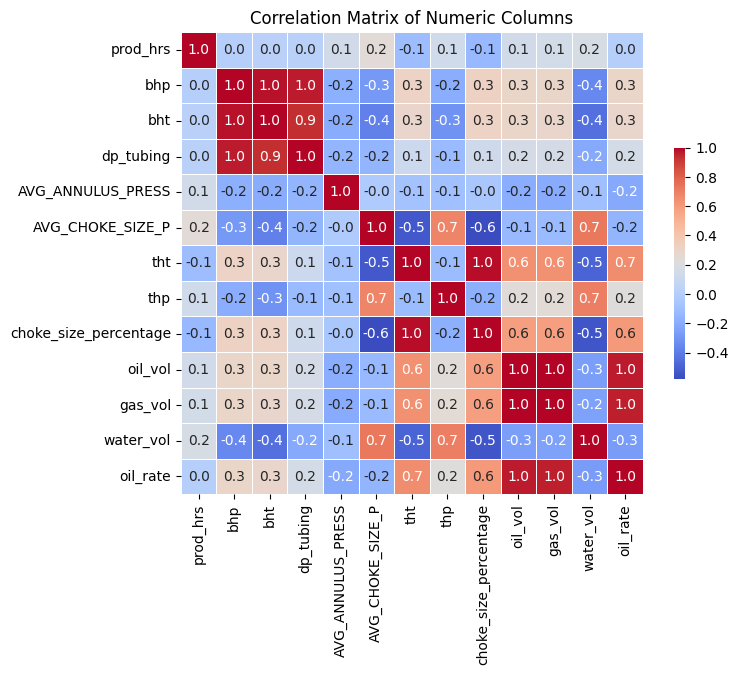

In [ ]:
correlation_matrix = df_active_producers_numeric.corr() # compute the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Columns')
plt.show() # plotting the correlation matrix

why is prod hours so uncorrelated

In [ ]:
for i in ['oil_rate', 'oil_vol', 'gas_vol', 'water_vol']:
    print("Correlation values for", i)
    print(correlation_matrix[i].sort_values(ascending=False), "\n\n") # displaying the correlation values for oil, water and gas volume as well as oil rate as these are the important dependent values

Correlation values for oil_rate
oil_rate                 1.000000
oil_vol                  0.965395
gas_vol                  0.962258
tht                      0.654040
choke_size_percentage    0.599549
bhp                      0.291657
bht                      0.287870
thp                      0.222366
dp_tubing                0.153027
prod_hrs                 0.005706
AVG_CHOKE_SIZE_P        -0.154089
AVG_ANNULUS_PRESS       -0.211984
water_vol               -0.275866
Name: oil_rate, dtype: float64 


Correlation values for oil_vol
oil_vol                  1.000000
gas_vol                  0.998467
oil_rate                 0.965395
tht                      0.639554
choke_size_percentage    0.582627
bhp                      0.293987
bht                      0.293338
thp                      0.234521
dp_tubing                0.156694
prod_hrs                 0.141000
AVG_CHOKE_SIZE_P        -0.132090
AVG_ANNULUS_PRESS       -0.194774
water_vol               -0.261630
Name: oil_vol, dtyp

In [ ]:
well_info = dict(set([(j, i) for i, j in df_active_producers[['WELL_BORE_CODE', 'well_name']].values.tolist()])) # creating a dictionary of well identiification with {code: name} structure

In [ ]:
grouped = df_active_producers.select_dtypes(include=[np.number]).drop(["NPD_FIELD_CODE", "NPD_FACILITY_CODE"], axis=1).groupby(by="well_name") # grouping by well

In [ ]:
grouped.describe().round() # statistical breakdown per well

prod_hrs                                             bhp                                                      bht                                                 dp_tubing                                                 AVG_ANNULUS_PRESS                                           AVG_CHOKE_SIZE_P                                                 tht                                                thp                                           choke_size_percentage                                         oil_vol                                                      gas_vol                                                                     water_vol                                                       oil_rate                                                      
             count  mean  std  min   25%   50%   75%   max   count   mean    std    min    25%    50%    75%    max   count   mean   std    min    25%    50%    75%    max     count   mean   std    min    25%    50%    75%    max             count  mean   std   min   25%   50%   75%   max            count  mean   std   min   25%   50%    75%    max   count  mean   std   min   25%   50%   75%    max   count  mean   std   min   25%   50%   75%   max                 count  mean   std  min  25%   50%   75%   max   count    mean     std   min    25%     50%     75%     max   count      mean       std     min       25%       50%       75%       max     count    mean     std   min     25%     50%     75%     max    count    mean     std   min    25%     50%     75%      max
well_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
5351        2723.0  23.0  3.0  1.0  24.0  24.0  24.0  24.0  2717.0  247.0   25.0    0.0  241.0  247.0  262.0  290.0  2717.0  102.0   9.0    0.0  100.0  102.0  105.0  107.0    2717.0  203.0  30.0    7.0  187.0  206.0  230.0  255.0            2224.0  12.0  10.0   0.0   0.0  14.0  22.0  27.0           2723.0  73.0  28.0   2.0  45.0  77.0  100.0  100.0  2723.0  44.0  18.0   0.0  32.0  35.0  50.0  115.0  2723.0  86.0   6.0  12.0  85.0  87.0  89.0  94.0                2723.0  14.0  17.0  1.0  3.0   6.0  17.0  83.0  2723.0  1448.0  1290.0   4.0  331.0  1042.0  2247.0  5644.0  2723.0  212269.0  182128.0   856.0   50923.0  165200.0  329368.0  789975.0    2723.0  2616.0  1286.0   0.0  2122.0  3100.0  3492.0  5692.0   2723.0  1509.0  1308.0  23.0  340.0  1079.0  2353.0   7777.0
5599        2836.0  23.0  4.0  0.0  24.0  24.0  24.0  24.0  2830.0   84.0  121.0    0.0    0.0    0.0  243.0  308.0  2830.0   35.0  50.0    0.0    0.0    0.0  106.0  108.0    2830.0   85.0  71.0   26.0   33.0   39.0  172.0  259.0            2823.0  18.0   5.0   0.0  15.0  19.0  21.0  30.0           2836.0  73.0  26.0   1.0  51.0  75.0  100.0  100.0  2836.0  48.0  20.0   0.0  33.0  39.0  59.0  121.0  2836.0  84.0   8.0  16.0  79.0  86.0  90.0  92.0                2836.0  17.0  19.0  0.0  4.0   7.0  26.0  98.0  2836.0  1615.0  1671.0   1.0  360.0   742.0  2666.0  5902.0  2836.0  235381.0  235898.0   183.0   54797.0  118564.0  377112.0  851132.0    2836.0  2411.0  1920.0   0.0   553.0  2133.0  4480.0  8020.0   2836.0  1679.0  1742.0  12.0  389.0   830.0  2783.0  24306.0
5769         121.0  24.0  2.0  6.0  24.0  24.0  24.0  24.0     0.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN     

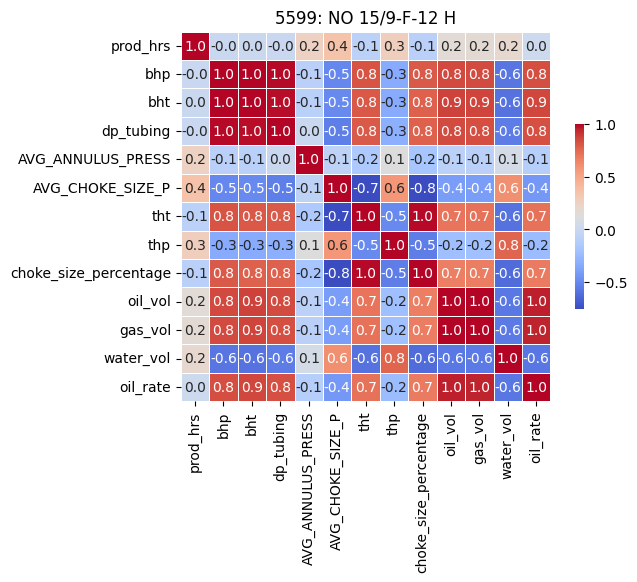

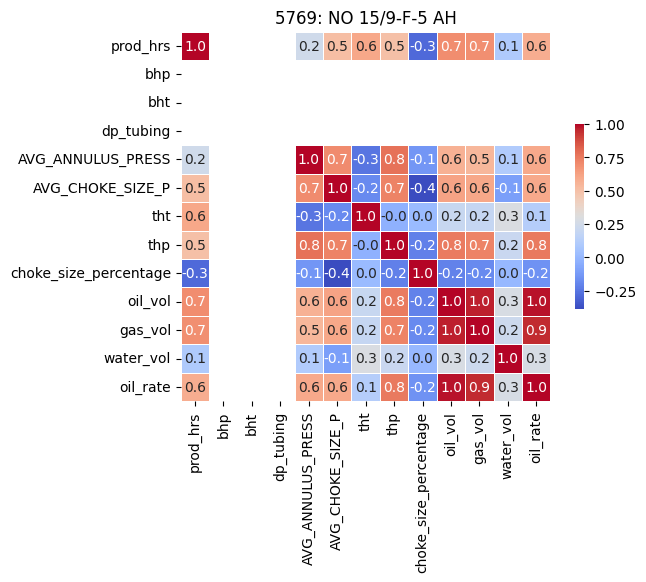

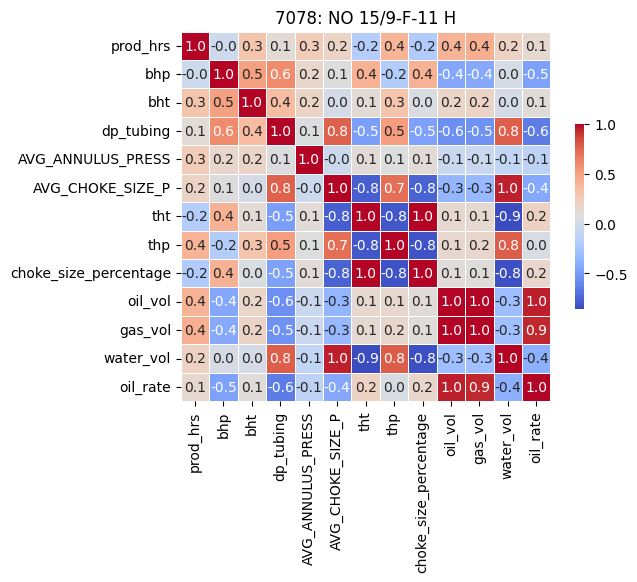

In [ ]:
for i, j in well_info.items():
    correlation_matrix = df_active_producers[(df_active_producers.well_name==int(i))].select_dtypes(include=[np.number]).drop(["NPD_FIELD_CODE", "NPD_FACILITY_CODE", "well_name"], axis=1).corr() # creating correlation matrix per well
    sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title(f'{i}: {j}')
    plt.show() # displaying correlation matrix per well


In [ ]:
print(df_active_producers[(df_active_producers.well_name==int(5769))][['bhp', 'bht', 'dp_tubing']].isna().all().all()) # checking if bhp, bht and dp_tubing columns are all null in well 5769

True


In [ ]:
print(f"The % of null values in column AVG_ANNULUS_PRESS for well 7405 is {(df_active_producers[df_active_producers.well_name==int(7405)].isnull().mean() * 100)['AVG_ANNULUS_PRESS'].round(2)}%") # checking if column AVG_ANNUAL_PRESS is almost completely null in well 7405

The % of null values in column AVG_ANNULUS_PRESS for well 7405 is 99.77%


In [ ]:
for i, j in well_info.items():
    correlation_matrix = df_active_producers[(df_active_producers.well_name==int(i))].select_dtypes(include=[np.number]).drop(["NPD_FIELD_CODE", "NPD_FACILITY_CODE", "well_name"], axis=1).corr()
    print(f'FOR WELL {i}: {j}\n')
    for m in ['oil_rate', 'oil_vol', 'gas_vol', 'water_vol']:
        print("\tCorrelation values for", m)
        print(correlation_matrix[m].sort_values(ascending=False), "\n\n") # displaying the correlation values for oil, water and gas volume as well as oil rate PER WELL as these are the important dependent values

FOR WELL 5599: NO 15/9-F-12 H

	Correlation values for oil_rate
oil_rate                 1.000000
oil_vol                  0.953853
gas_vol                  0.950393
bht                      0.860724
bhp                      0.838933
dp_tubing                0.834159
tht                      0.714279
choke_size_percentage    0.680239
prod_hrs                 0.022398
AVG_ANNULUS_PRESS       -0.108631
thp                     -0.244506
AVG_CHOKE_SIZE_P        -0.435456
water_vol               -0.580747
Name: oil_rate, dtype: float64 


	Correlation values for oil_vol
oil_vol                  1.000000
gas_vol                  0.998564
oil_rate                 0.953853
bht                      0.873279
bhp                      0.849345
dp_tubing                0.845479
tht                      0.708066
choke_size_percentage    0.671179
prod_hrs                 0.162786
AVG_ANNULUS_PRESS       -0.076755
thp                     -0.220334
AVG_CHOKE_SIZE_P        -0.407859
water_vol           

add choke size axis

## Checking For Gaps in Dates:

In [ ]:
for i, j in well_info.items():
    gap_counter = 0
    consecutive_counter = 0
    dates = list(df_active_producers[(df_active_producers.well_name==i)]['date']) # getting list of dates per well
    print(f'FOR WELL {i}: {j}\n')
    print("The gap dates are:")
    for m in range(len(dates) - 1):
        if (dates[m+1] - dates[m]) > pd.Timedelta(days=1): # checking if two consecutive dates in the data collection are actually conecutive
            gap_counter += 1
            print((dates[m].strftime('%Y-%m-%d'), dates[m+1].strftime('%Y-%m-%d'))) # if not consecutive, print the date
        else:
            consecutive_counter += 1
    print(f"There are {gap_counter} gaps in dates\nThere are {consecutive_counter} consecutive dates\n\n")

FOR WELL 5599: NO 15/9-F-12 H

The gap dates are:
('2008-03-26', '2008-03-28')
('2008-04-27', '2008-04-29')
('2008-05-30', '2008-06-01')
('2008-08-06', '2008-08-08')
('2008-09-02', '2008-09-06')
('2008-09-08', '2008-09-10')
('2009-03-13', '2009-03-15')
('2009-03-16', '2009-03-18')
('2009-03-25', '2009-03-30')
('2009-05-04', '2009-05-06')
('2009-08-02', '2009-08-04')
('2009-08-29', '2009-09-05')
('2009-09-27', '2009-10-01')
('2010-02-27', '2010-03-03')
('2010-03-06', '2010-03-08')
('2010-08-15', '2010-08-29')
('2010-09-22', '2010-09-24')
('2011-02-01', '2011-02-05')
('2011-06-20', '2011-07-01')
('2011-07-04', '2011-07-07')
('2011-07-08', '2011-07-10')
('2011-07-11', '2011-07-15')
('2011-07-16', '2011-07-20')
('2011-07-22', '2011-07-25')
('2011-07-26', '2011-07-28')
('2011-07-30', '2011-08-04')
('2011-10-15', '2011-11-05')
('2011-11-24', '2011-11-28')
('2011-11-28', '2011-12-02')
('2011-12-02', '2011-12-05')
('2011-12-08', '2011-12-11')
('2011-12-12', '2011-12-15')
('2011-12-24', '2011-1

## Visuaization:

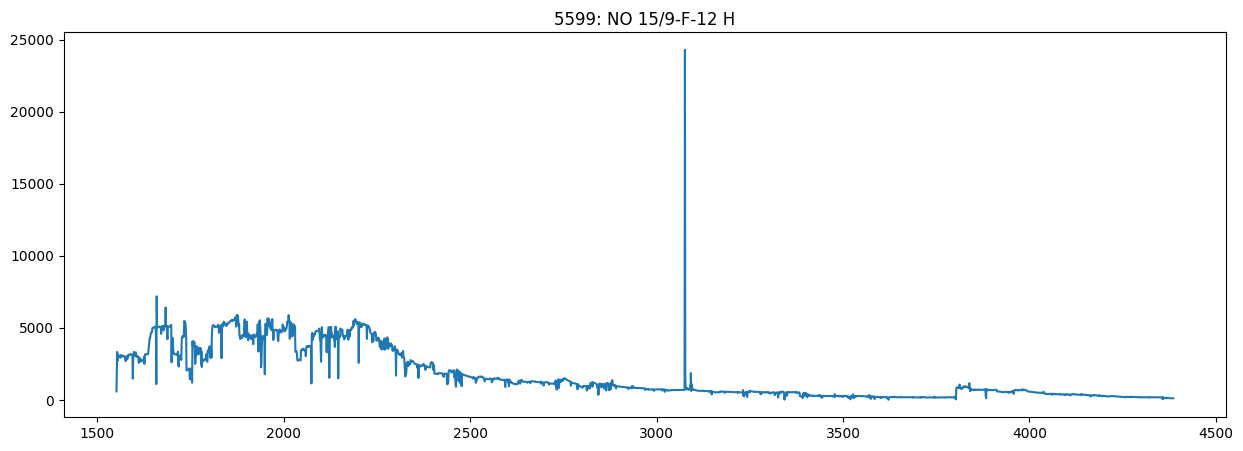

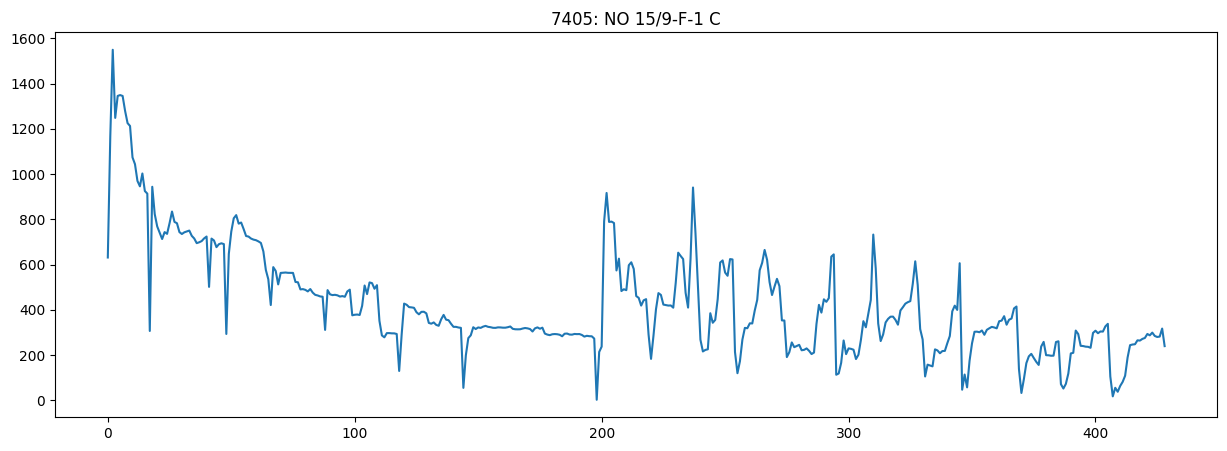

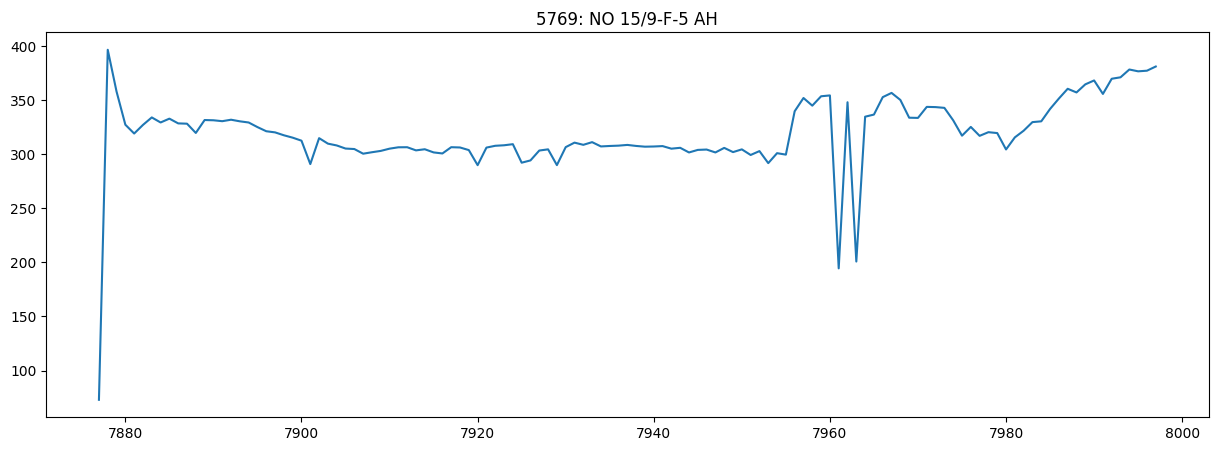

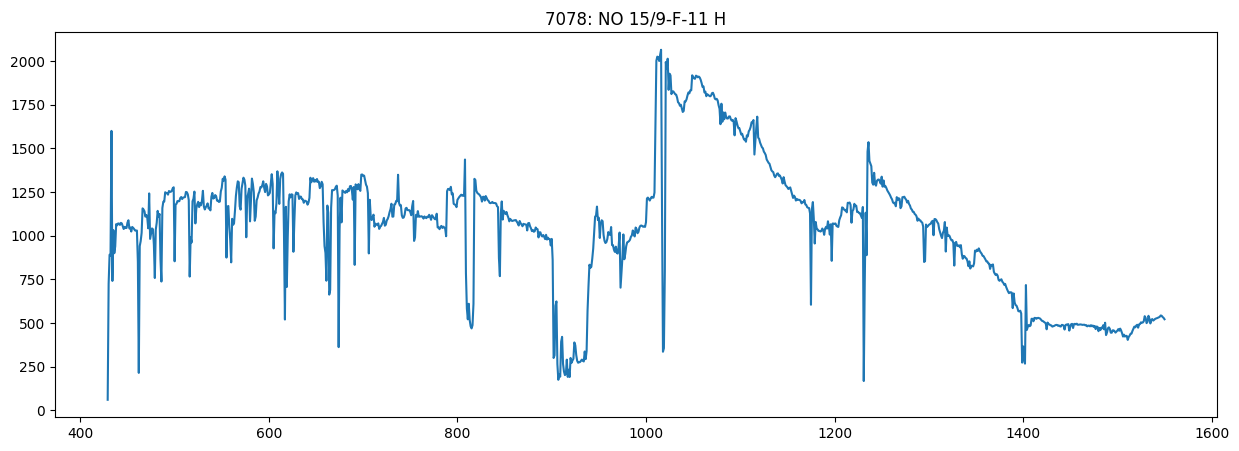

In [ ]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    plt.plot(df_active_producers[(df_active_producers.well_name==i)]['oil_rate']) # visualizing the oil rate over time per well
    plt.show()

## Outlier Detection & Clean Up

In [ ]:
df_active_producers_outliers = df_active_producers.copy()
df_active_producers_outliers[['z_score_outlier', 'gradient_outlier', 'consecutive_gradient_outlier', 'outlier']] = False # creating outlier columns that will be needed to identify if a row of data counts as outlier

In [ ]:
z_score_flag = 4
gradient_flag = 3
consecutive_gradient_flag = 5 # adjustable normal distirbution values that are used as outlier classification boundary lines

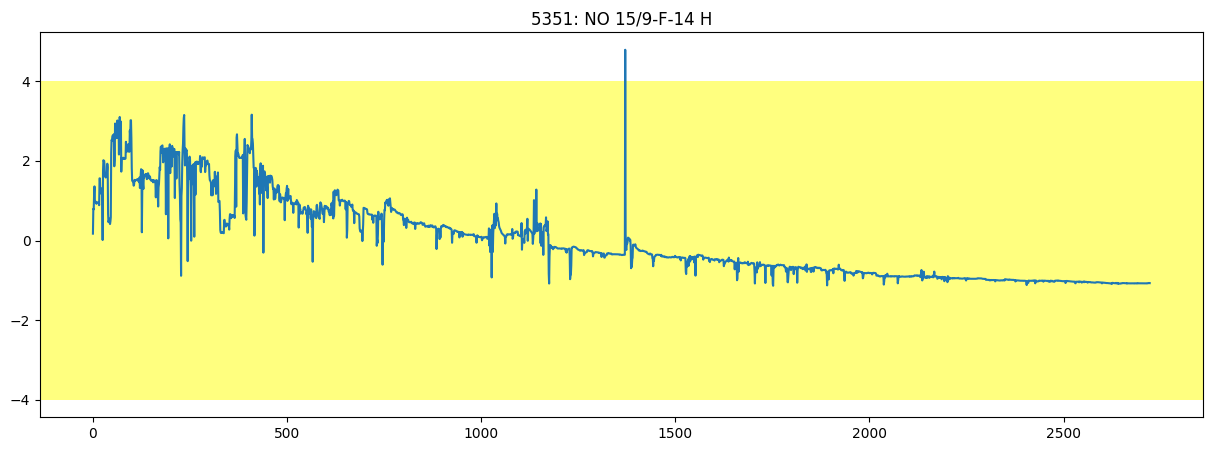

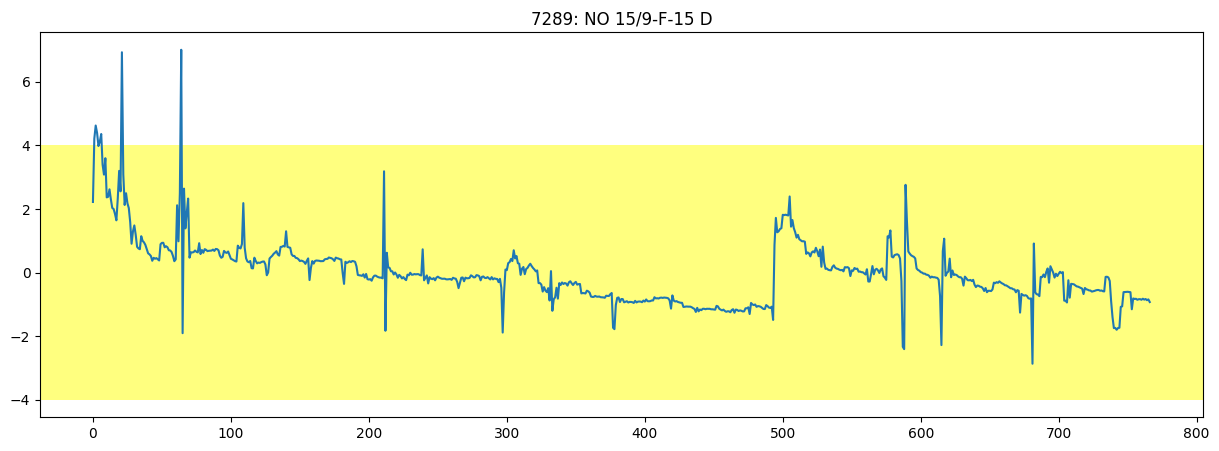

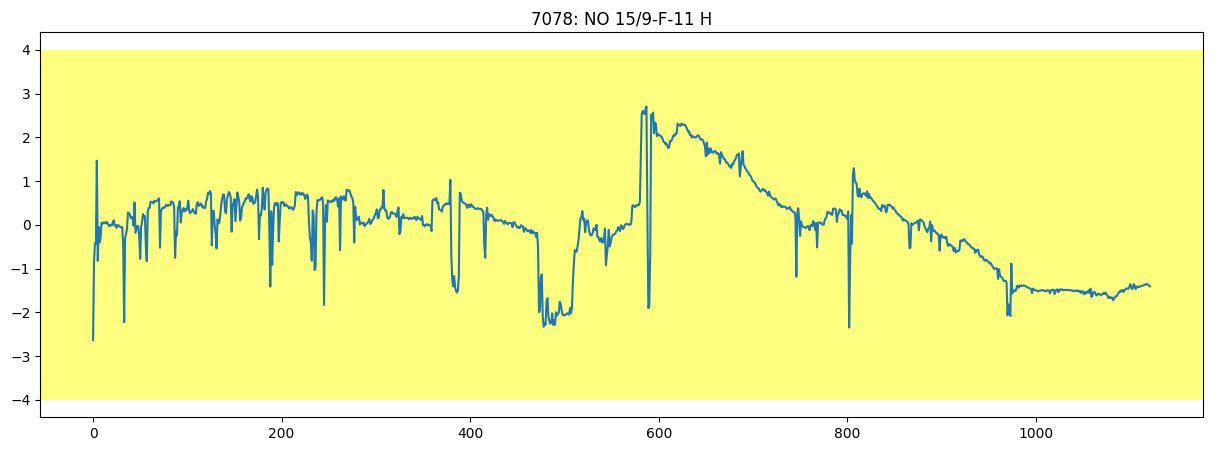

In [ ]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    well = df_active_producers_outliers[(df_active_producers_outliers.well_name==i)]['oil_rate'] # retriving oil rate values per well
    z_score = (well - well.mean()) / well.std() # creating normal distirbution of values
    z_score_outlier_check = (z_score > z_score_flag) | (z_score < -z_score_flag) # checking if values are outside set boundaries
    df_active_producers_outliers.loc[(df_active_producers_outliers.well_name==i), 'z_score_outlier'] = z_score_outlier_check # if values are outside usual boundaries, classofy as outlier
    plt.plot(z_score.reset_index()['oil_rate'])
    plt.axhspan(-z_score_flag, z_score_flag, facecolor='yellow', alpha=0.5)
    plt.show() # visualization of process

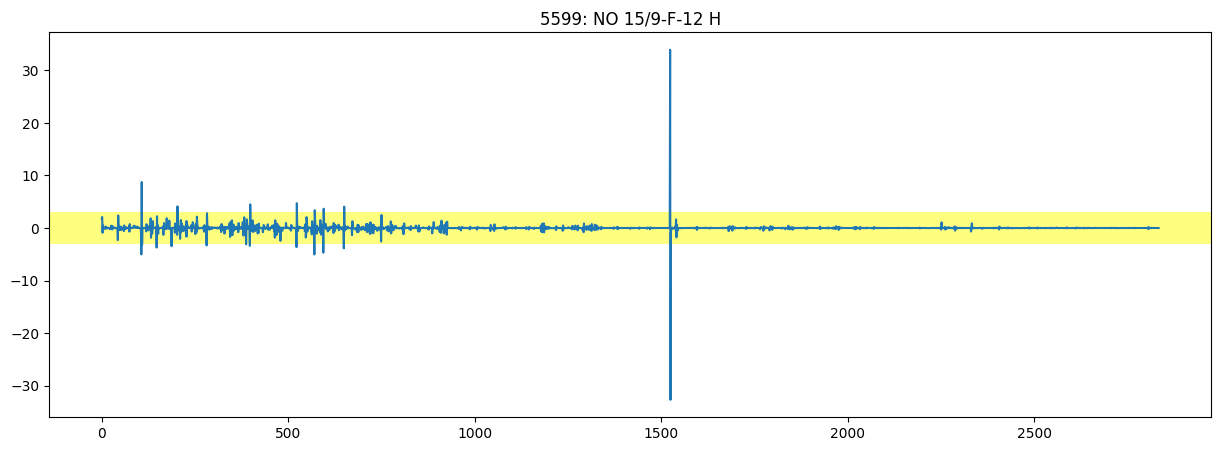

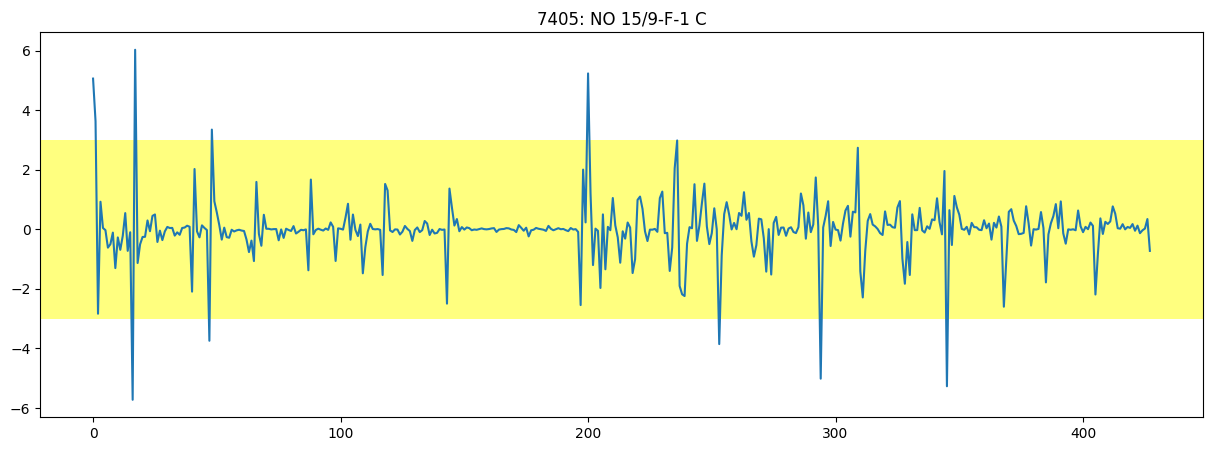

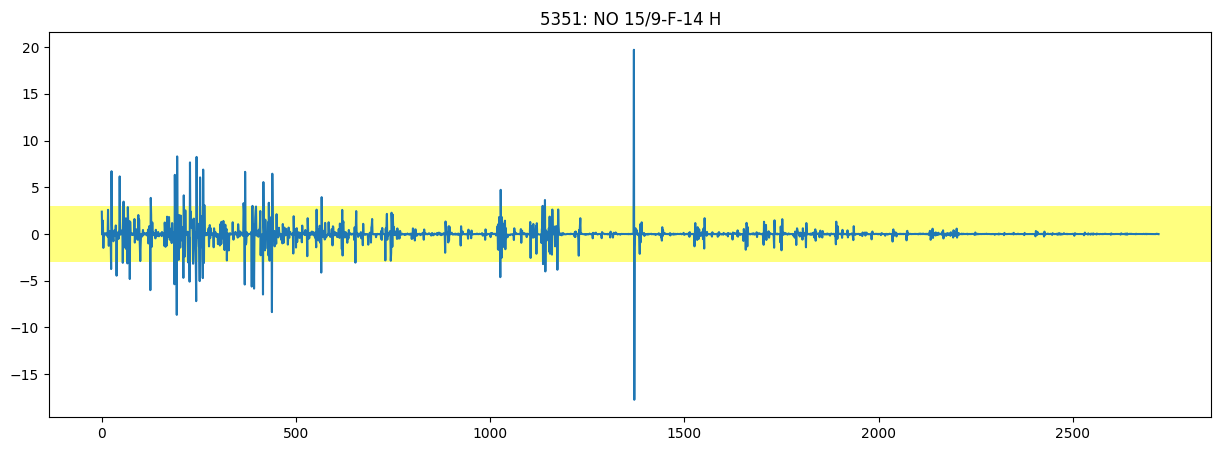

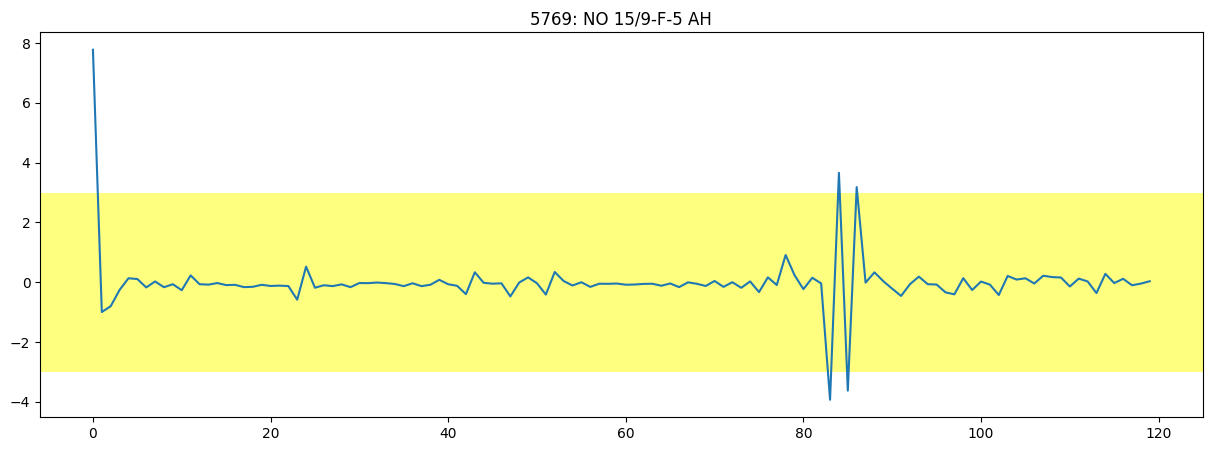

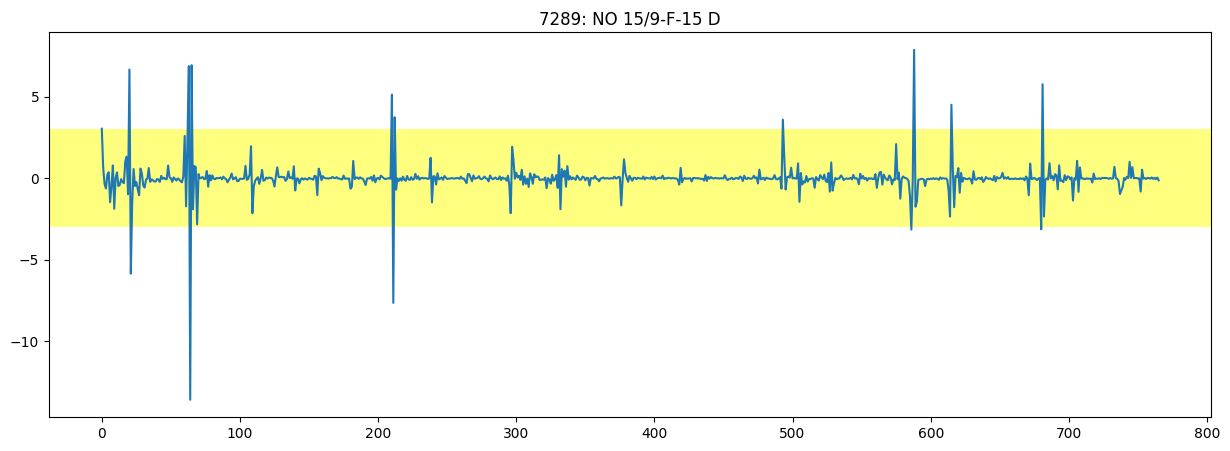

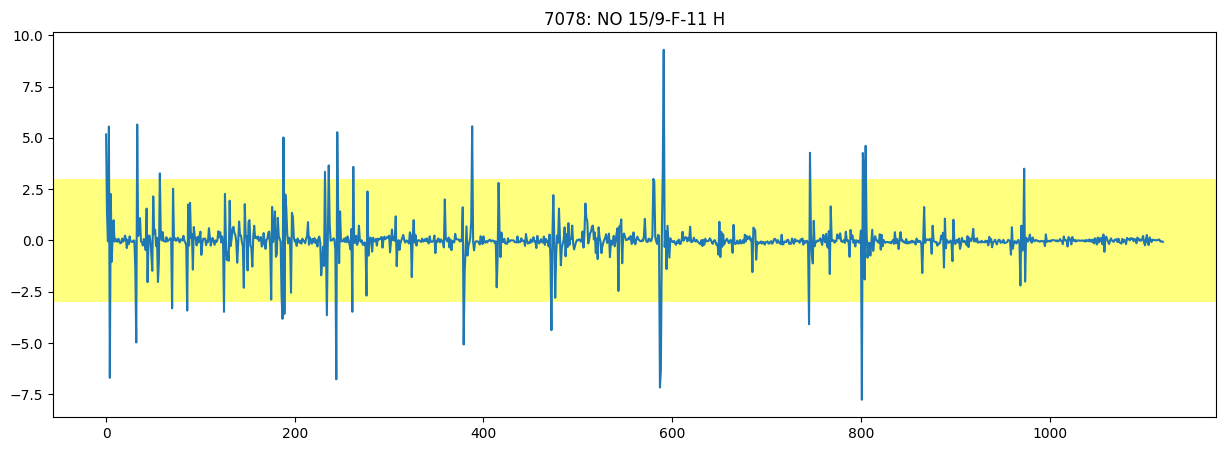

In [ ]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    well = df_active_producers_outliers[(df_active_producers_outliers.well_name==i)]['oil_rate'].diff().shift(-1) # retriving gradient of oil rate values/oil rate value changes per well
    z_score = (well - well.mean()) / well.std() # creating normal distirbution of gradient values
    gradient_outlier_check = (z_score > gradient_flag) | (z_score < -gradient_flag) # checking if values are outside set boundaries
    df_active_producers_outliers.loc[(df_active_producers_outliers.well_name==i), 'gradient_outlier'] = gradient_outlier_check # if values are outside usual boundaries, classofy as outlier
    plt.plot(z_score.reset_index()['oil_rate'])
    plt.axhspan(-gradient_flag, gradient_flag, facecolor='yellow', alpha=0.5)
    plt.show() # visualization of process

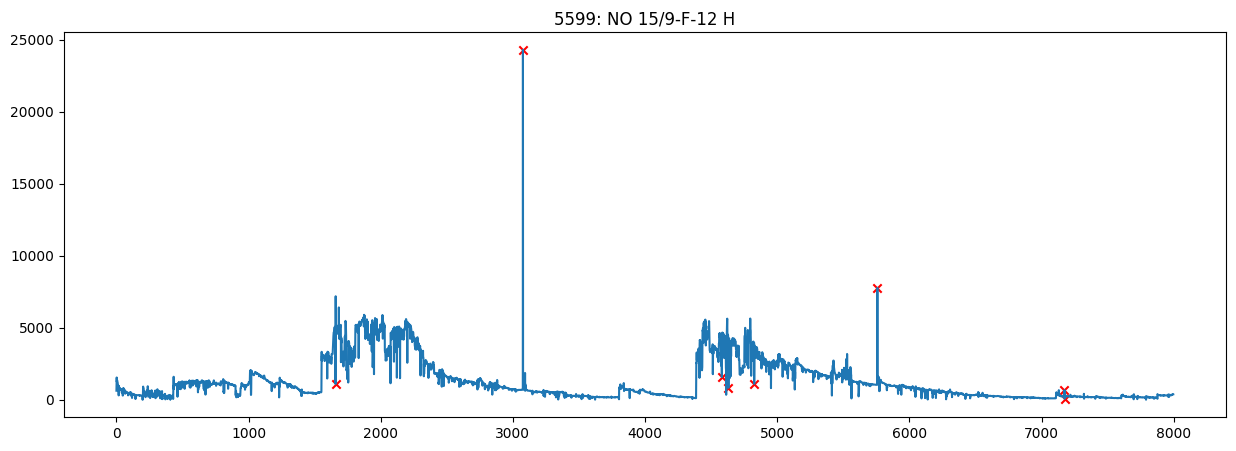

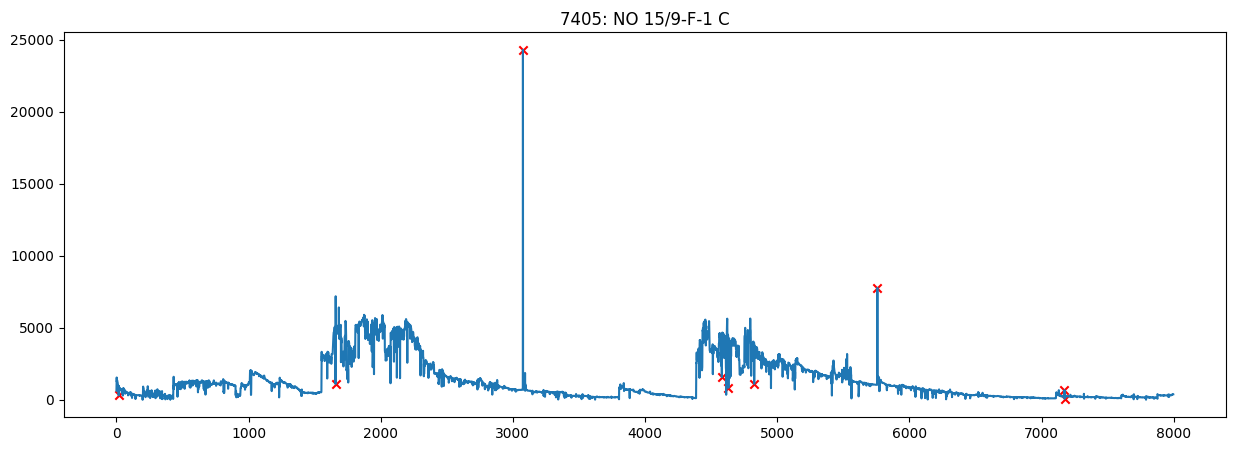

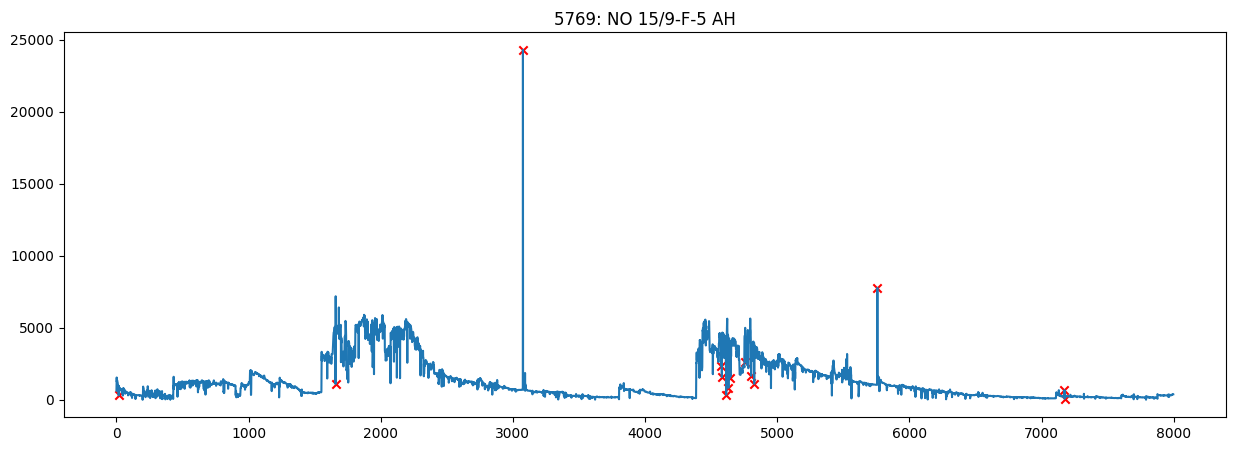

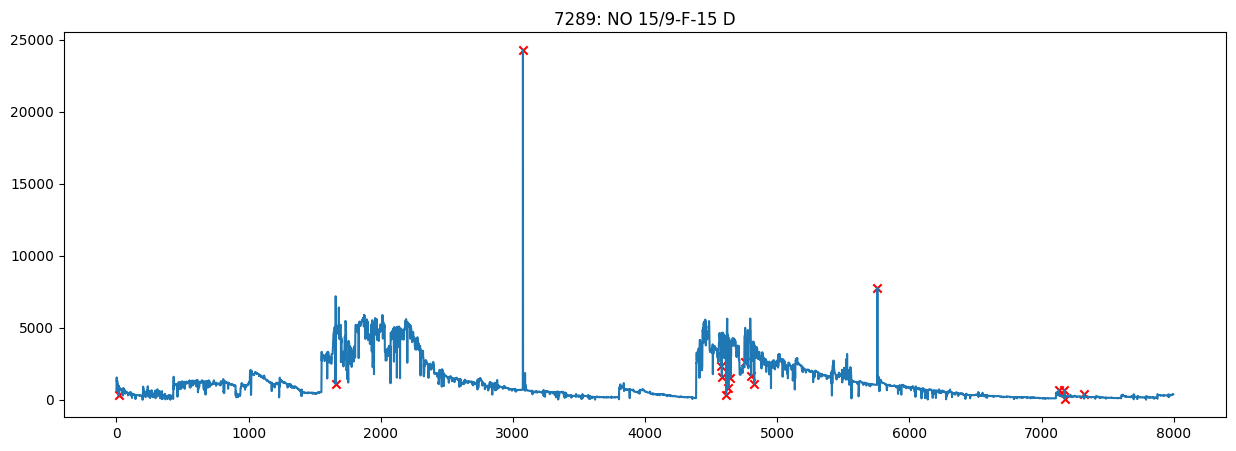

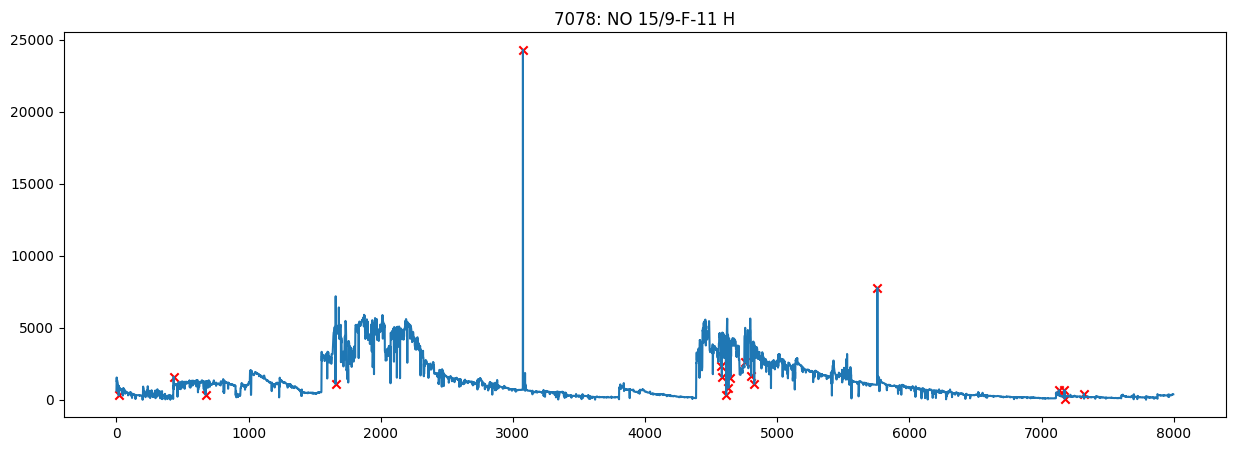

In [ ]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    well = df_active_producers_outliers[(df_active_producers_outliers.well_name==i)]['oil_rate'].diff().shift(-1) # retriving gradient of oil rate values/oil rate value changes per well
    well_next = well.shift(-1)
    z_score = (well - well.mean()) / well.std() # creating normal distirbution of gradient values
    z_score_next = (well_next - well.mean()) / well.std() # creating normal distirbution of gradient values
    consecutive_gradient_outlier_check = (z_score.abs() > consecutive_gradient_flag) & (z_score_next.abs() > consecutive_gradient_flag) & (well * well_next < 0)
    consecutive_gradient_outlier_check_shifted = consecutive_gradient_outlier_check.shift(1)
    df_active_producers_outliers.loc[(df_active_producers_outliers.well_name==i), 'consecutive_gradient_outlier'] = consecutive_gradient_outlier_check_shifted # if values are outside usual boundaries, classofy as outlier
    outlier_indices = df_active_producers_outliers[df_active_producers_outliers['consecutive_gradient_outlier'] == True]['consecutive_gradient_outlier'].index # labeling rows as outliers if conditions match
    plt.plot(df_active_producers_outliers['oil_rate'])
    plt.scatter(outlier_indices, df_active_producers_outliers.loc[outlier_indices, 'oil_rate'], color='red', marker='x', label='Outliers')
    plt.show() # visualization of process

In [ ]:
df_active_producers_outliers['outlier'] = (df_active_producers_outliers['z_score_outlier'] & df_active_producers_outliers['gradient_outlier']) | df_active_producers_outliers['consecutive_gradient_outlier'] # classifying outliers as values that both violate the normal distibrution boundary value and the gradient normal distirbution value

interpolate all outliers

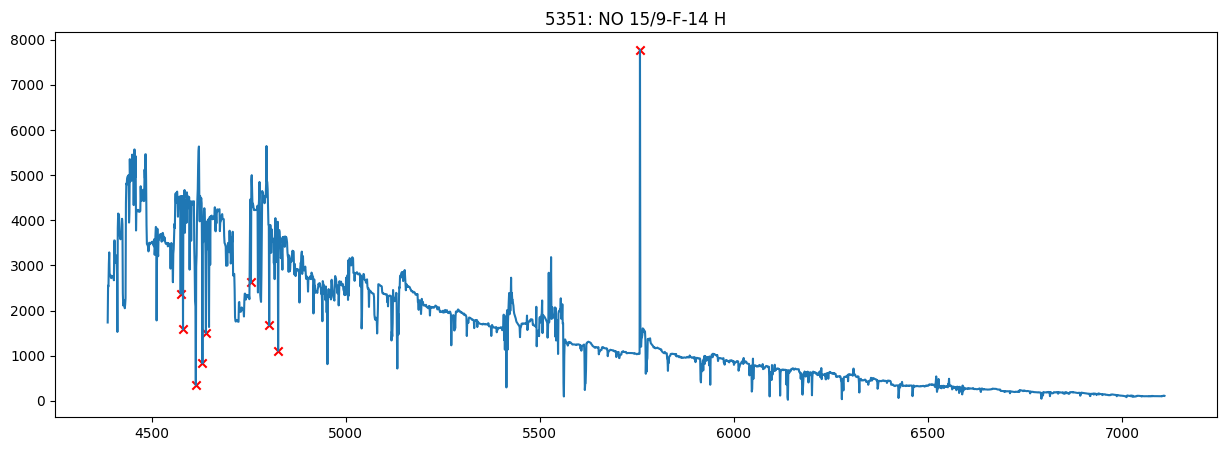

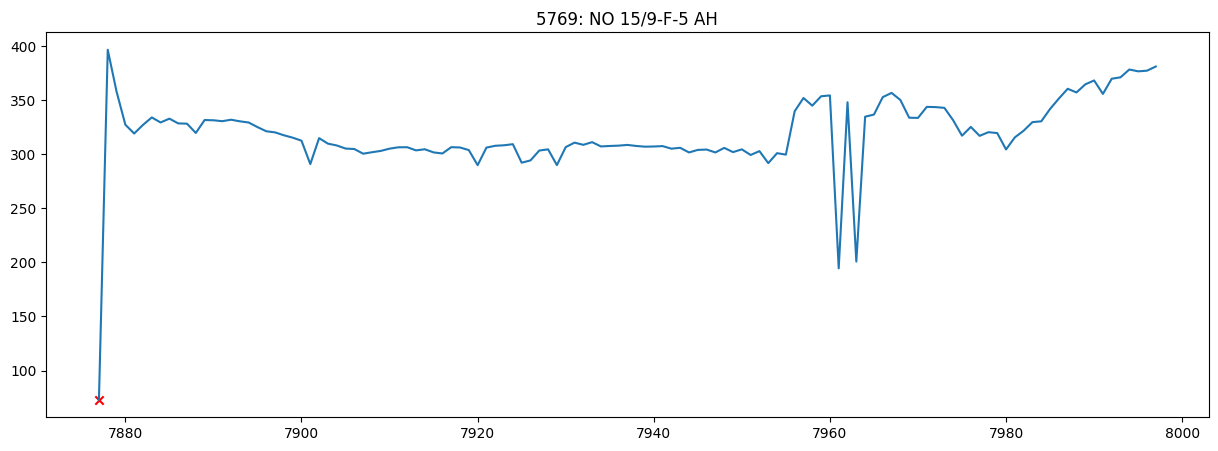

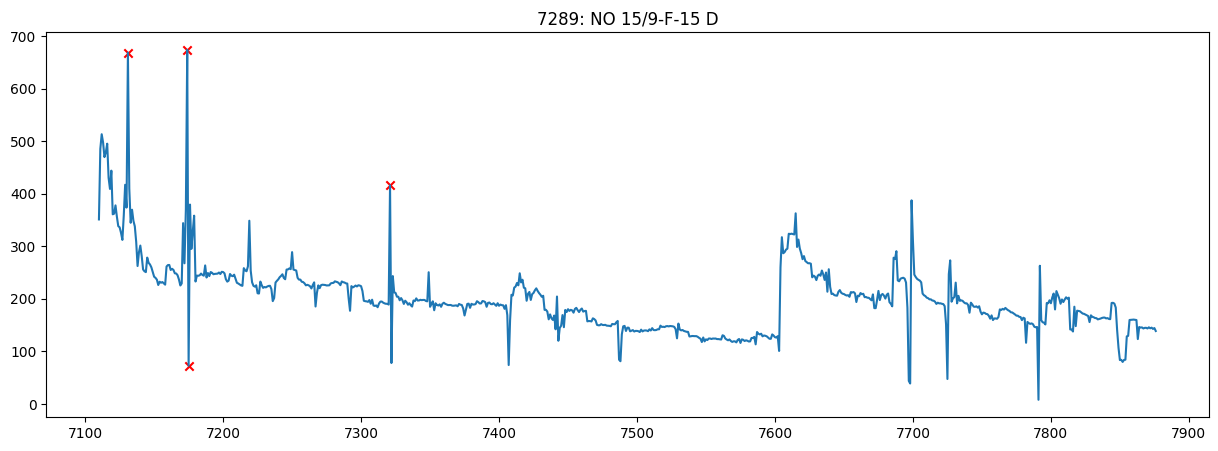

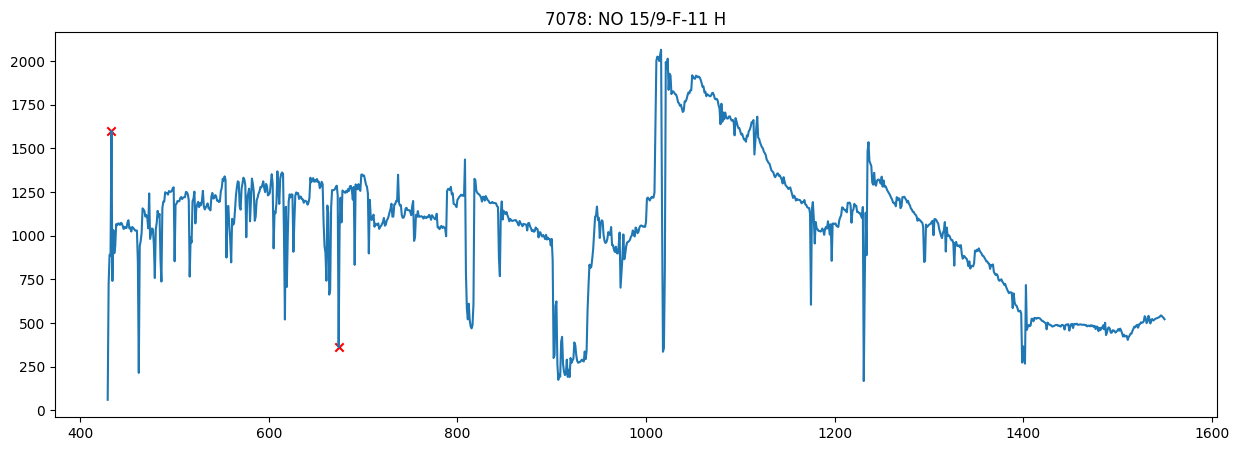

In [ ]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    well = df_active_producers_outliers[(df_active_producers_outliers.well_name==i)]
    outlier_indices = well[well['outlier'] == True]['outlier'].index # labeling rows as outliers if conditions match
    plt.plot(well['oil_rate'])
    plt.scatter(outlier_indices, well.loc[outlier_indices, 'oil_rate'], color='red', marker='x', label='Outliers')
    plt.show() # visualizing outliers

In [ ]:
df_active_producers['oil_rate'] = np.where(df_active_producers_outliers['outlier'], np.nan, df_active_producers['oil_rate'])
df_active_producers['oil_rate'] = df_active_producers['oil_rate'].interpolate() # interpolating outliers

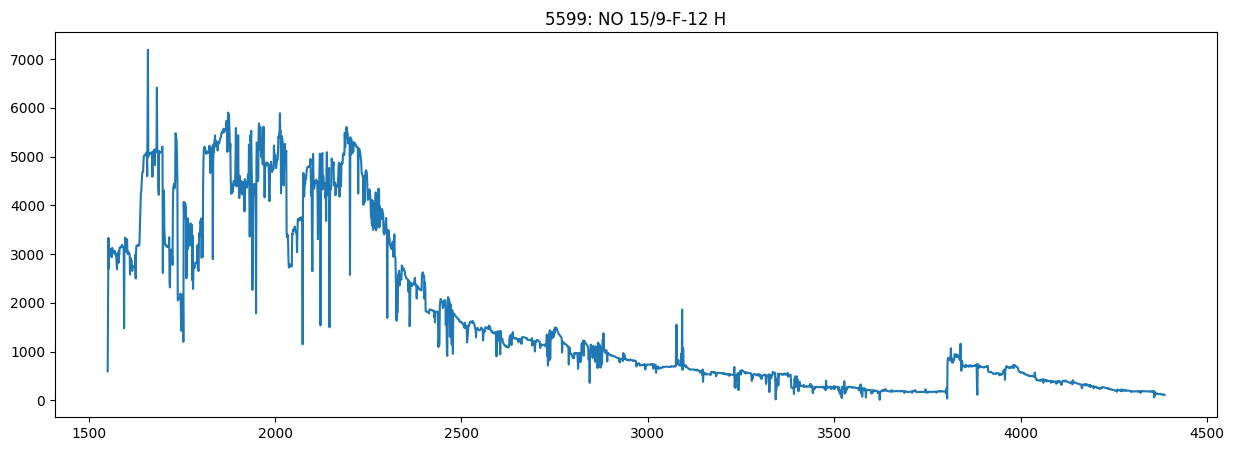

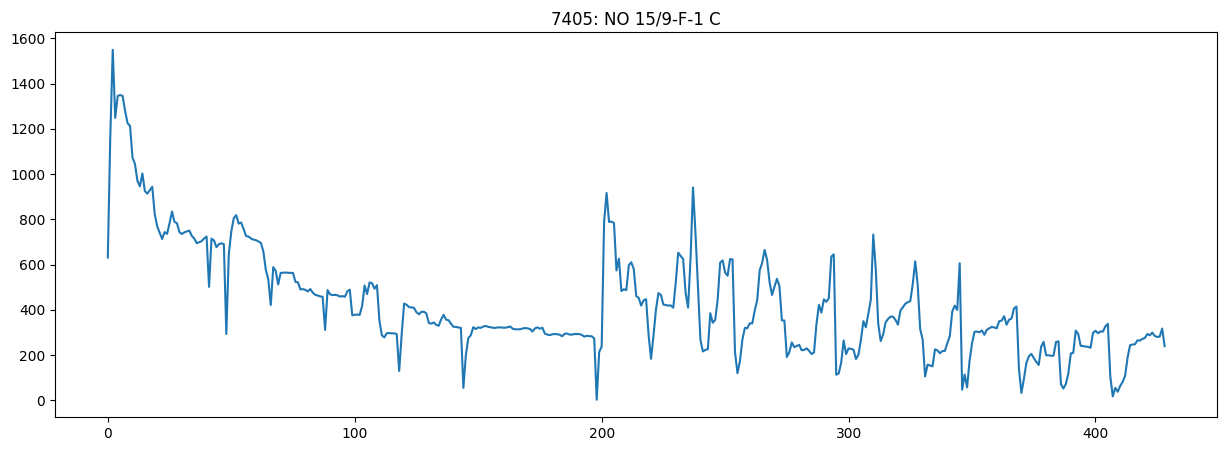

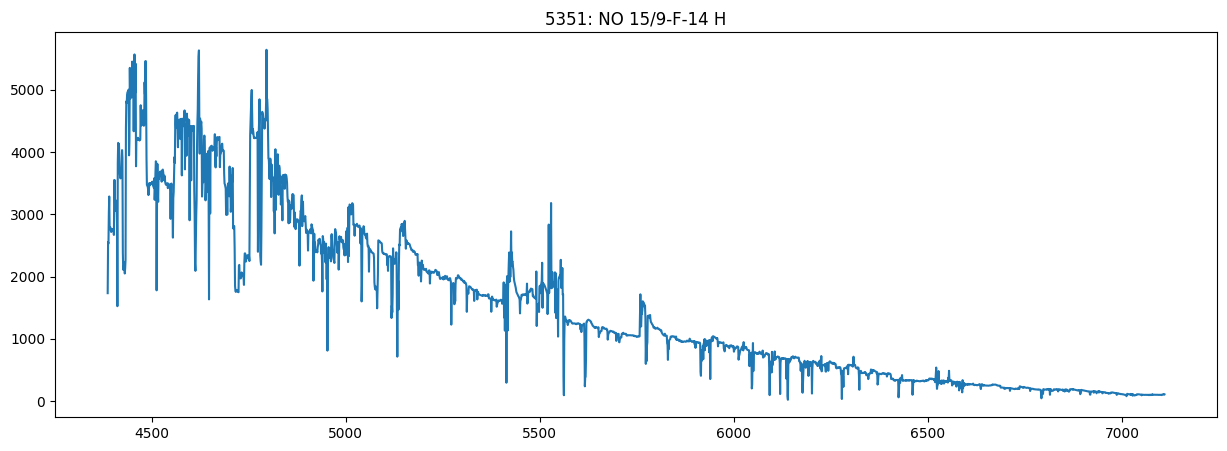

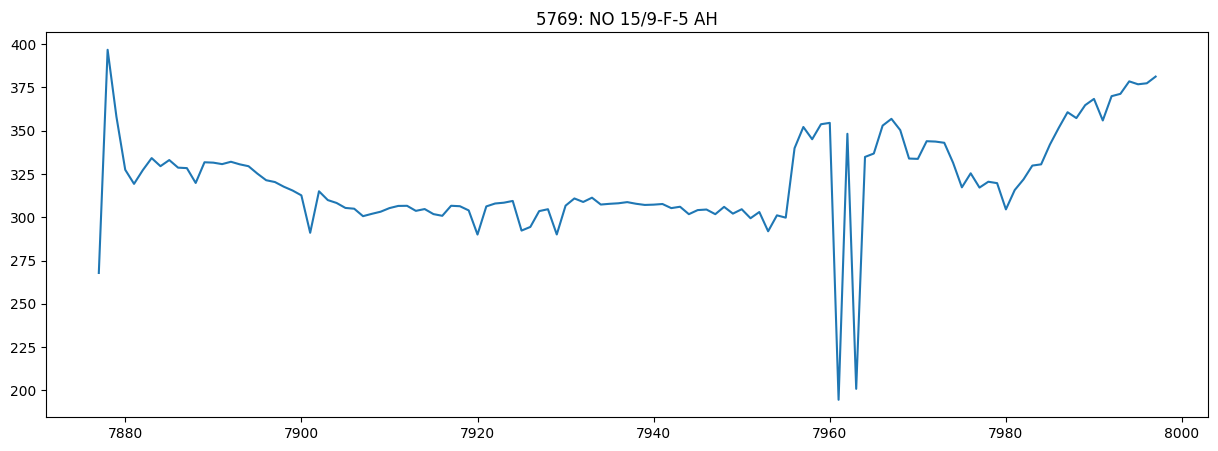

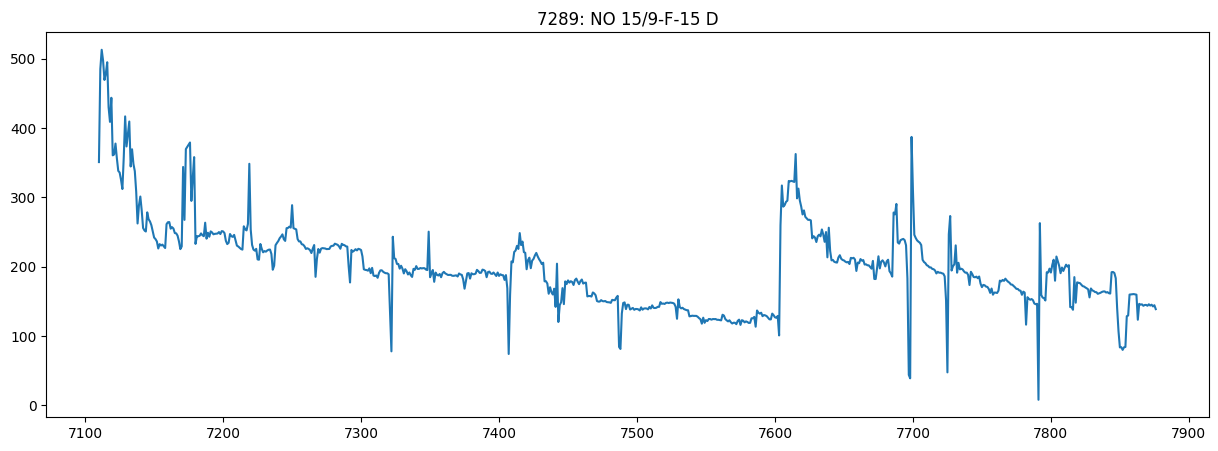

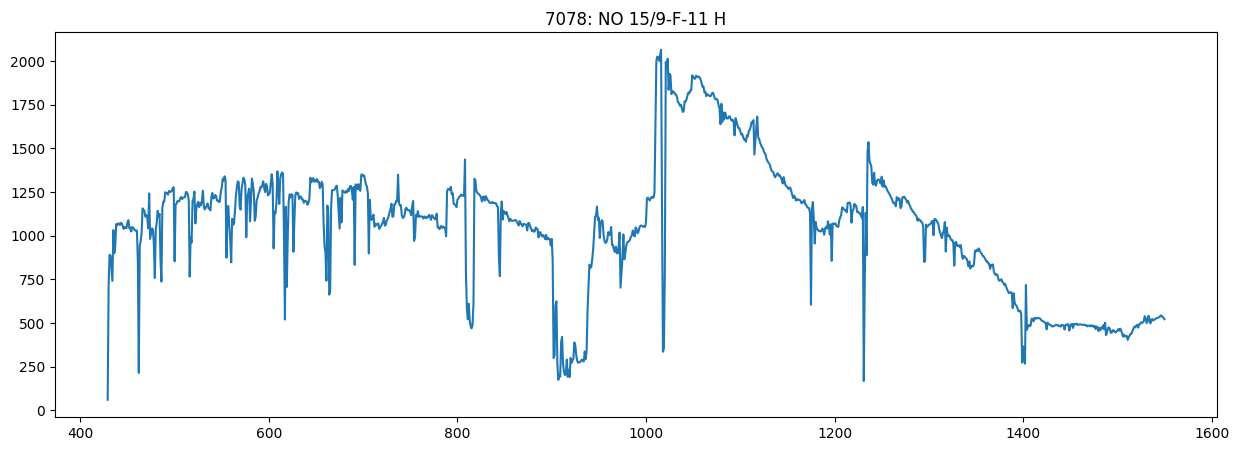

In [ ]:
for i, j in well_info.items():
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    plt.plot(df_active_producers[(df_active_producers.well_name==i)]['oil_rate'])
    plt.show() # displaying new graphs with interpolated values

## Time Series Statistics

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
for i, j in well_info.items():
    print(f'FOR WELL {i}: {j}\n')
    timeseries_data = df_active_producers[(df_active_producers.well_name==i)]['oil_rate']
    adf_result = adfuller(timeseries_data, autolag='AIC') # performing AIC test
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    print('Critical Values:', adf_result[4])
    kpss_result = kpss(timeseries_data, regression='c') # performing KPSS test
    print('KPSS Statistic:', kpss_result[0])
    print('p-value:', kpss_result[1])
    print('Critical Values:', kpss_result[3])
    print("\n\n")

FOR WELL 5599: NO 15/9-F-12 H

ADF Statistic: -1.2679544121133908
p-value: 0.643702761601133
Critical Values: {'1%': -3.4326759684453894, '5%': -2.862567650915498, '10%': -2.567317049830551}
KPSS Statistic: 7.0243206552767745
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 7405: NO 15/9-F-1 C

ADF Statistic: -4.418366402205514
p-value: 0.00027538764850988976
Critical Values: {'1%': -3.445867291195605, '5%': -2.868380822100627, '10%': -2.5704139268867925}
KPSS Statistic: 1.9705516174286422
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 5351: NO 15/9-F-14 H



<ipython-input-267-7c3718c05783>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c') # performing KPSS test
<ipython-input-267-7c3718c05783>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c') # performing KPSS test


ADF Statistic: -1.4949218689311465
p-value: 0.5360219053174865
Critical Values: {'1%': -3.432778771617089, '5%': -2.862613052530749, '10%': -2.5673412216328595}
KPSS Statistic: 7.791217682797631
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 5769: NO 15/9-F-5 AH

ADF Statistic: -1.0217712416542095
p-value: 0.7452411573729162
Critical Values: {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}
KPSS Statistic: 0.6678008326110239
p-value: 0.01647265158081601
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 7289: NO 15/9-F-15 D

ADF Statistic: -4.972919650355822
p-value: 2.5101263059090067e-05
Critical Values: {'1%': -3.4389608473398194, '5%': -2.8653404270188476, '10%': -2.568793735369693}
KPSS Statistic: 1.600327003341019
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}



FOR WELL 7078: NO 15/9-F-11 H

ADF Statistic: -1.9906866917501

<ipython-input-267-7c3718c05783>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c') # performing KPSS test
<ipython-input-267-7c3718c05783>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c') # performing KPSS test
<ipython-input-267-7c3718c05783>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(timeseries_data, regression='c') # performing KPSS test


## Finding General Trends

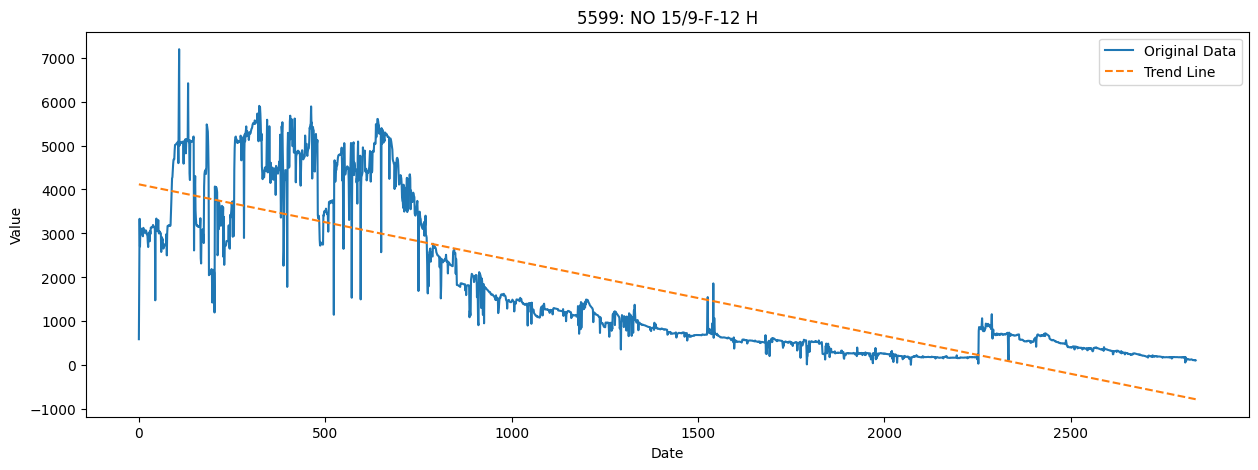

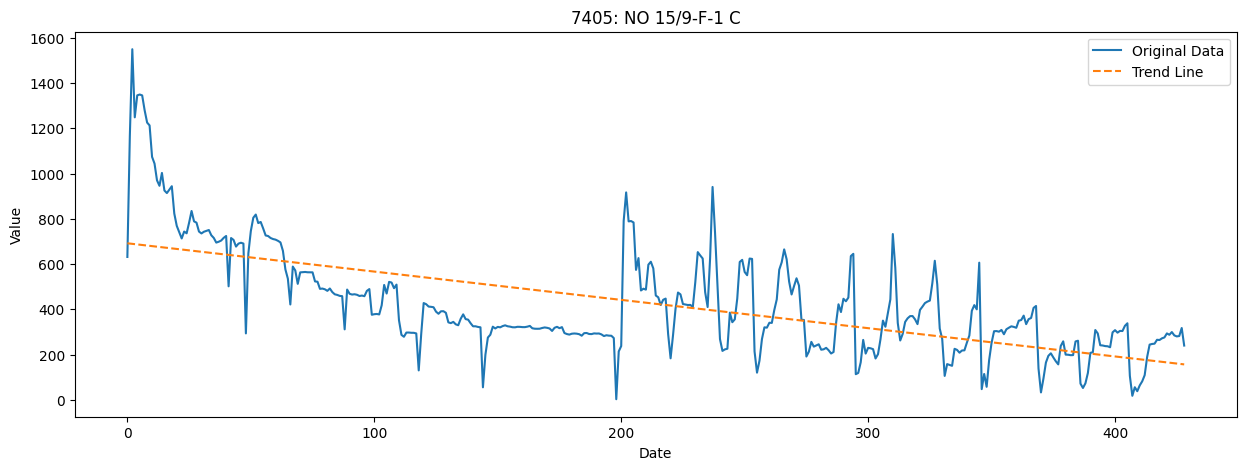

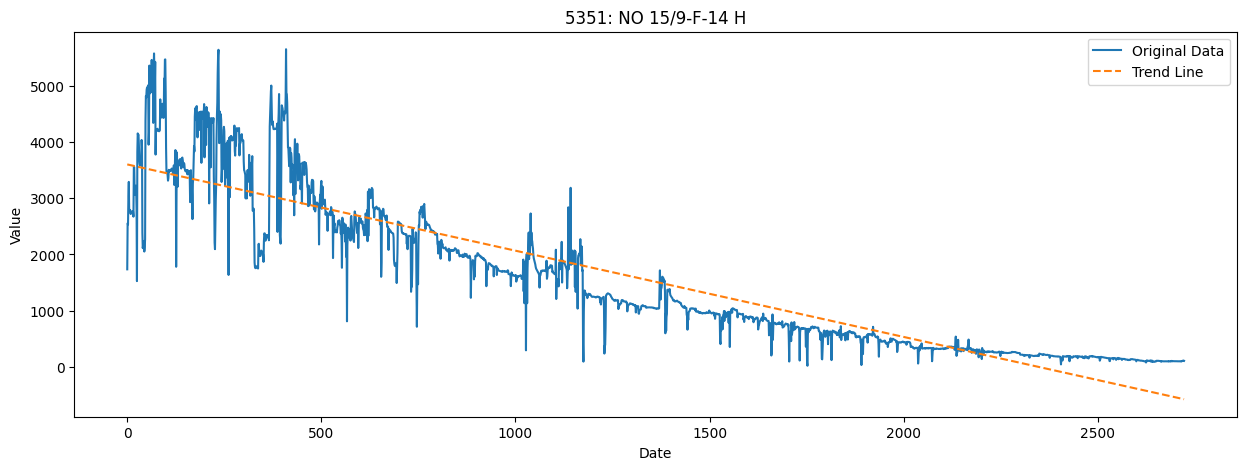

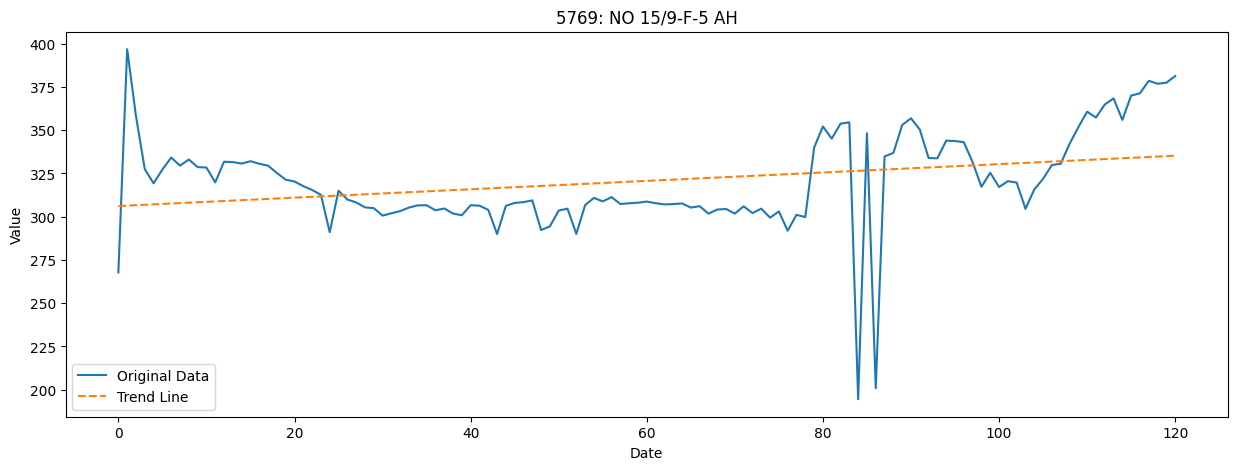

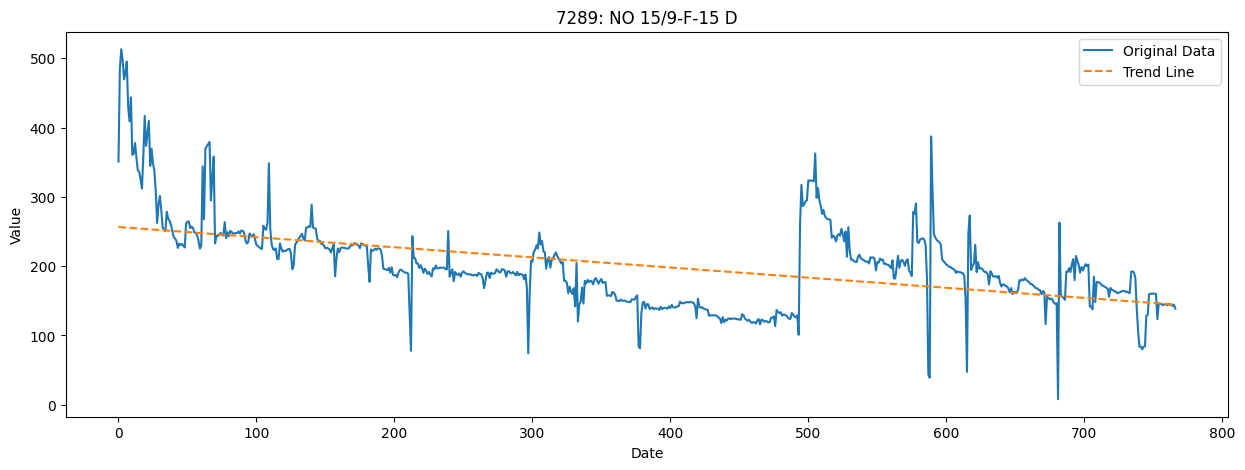

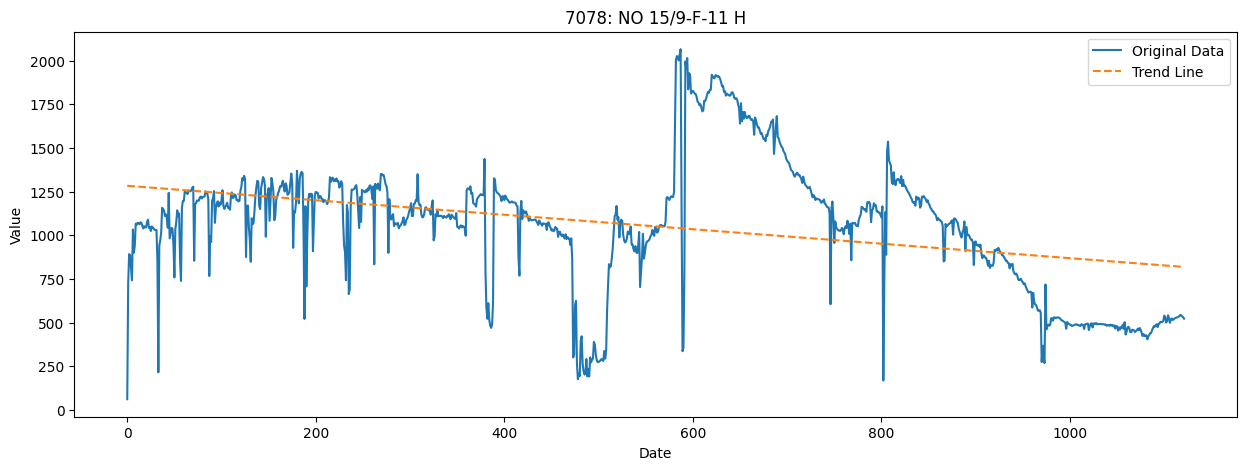

In [ ]:
for i, j in well_info.items():
    linear_regression_model = LinearRegression() # creating a linear regression model per well
    well = df_active_producers[(df_active_producers.well_name==i)].reset_index()['oil_rate']
    well_index = np.arange(len(well)).reshape(-1, 1)
    linear_regression_model.fit(well_index, well) # fitting the model on the data
    trend_line = linear_regression_model.predict(well_index) # creating the general trend line
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    plt.plot(well, label='Original Data')
    plt.plot(well.index, trend_line, label='Trend Line', linestyle='--')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show() # visualizing process

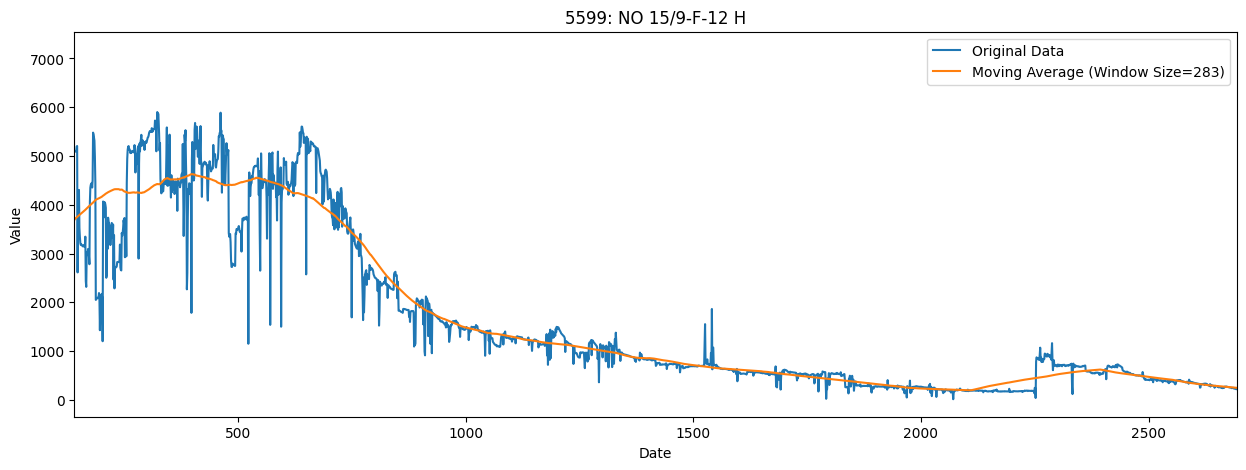

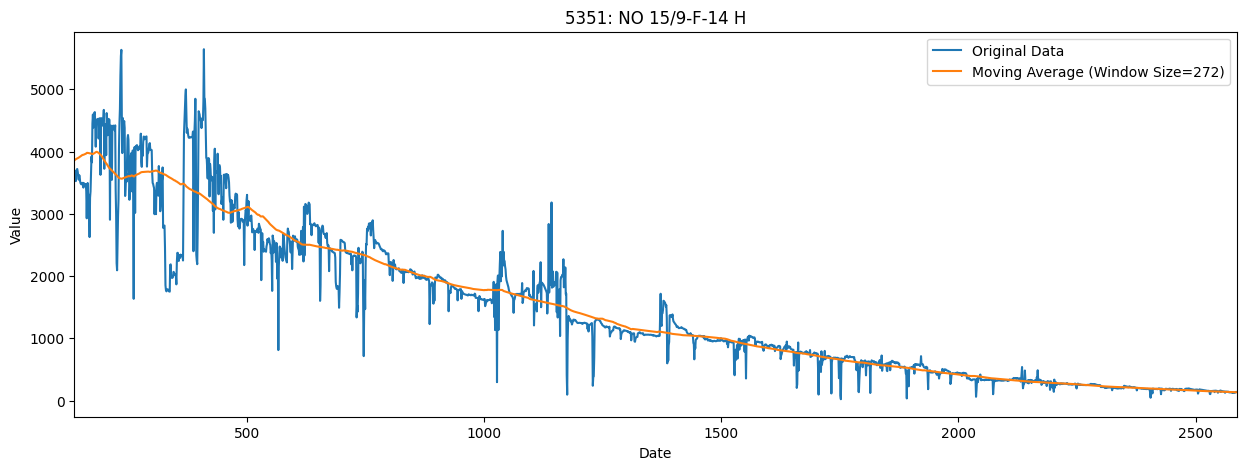

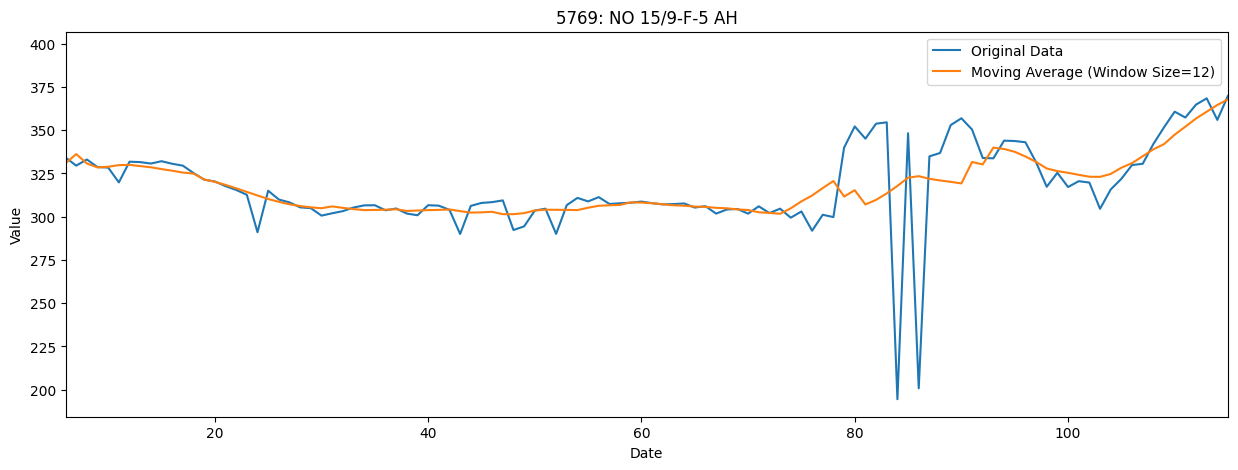

In [ ]:
for i, j in well_info.items():
    well = df_active_producers[(df_active_producers.well_name==i)].reset_index()['oil_rate']
    window_size = int(len(well) * 0.1)
    rolling_avg = well.rolling(window=window_size, center=True).mean() # creating a rolling window average per well with 10% of each well's data as the window size
    plt.figure(figsize=(15,5))
    plt.title(f'{i}: {j}')
    plt.plot(well, label='Original Data')
    plt.plot(rolling_avg, label=f'Moving Average (Window Size={window_size})')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Value')
    start_date = well.index[window_size // 2]
    end_date = well.index[-window_size // 2]
    plt.xlim(start_date, end_date)
    plt.show() # visualizing general trend

## Monthly Grouping Statistics

In [ ]:
from matplotlib.dates import DateFormatter, MonthLocator
for i, j in well_info.items():
    print(f'FOR WELL {i}: {j}\n')
    well = df_active_producers[(df_active_producers.well_name==i)].reset_index()[['date', 'oil_rate']] # retriving oil rate per well
    monthly_avg = well.groupby(well['date'].dt.to_period('M')).mean() # finding monthly average oil rate per well
    monthly_avg.index = monthly_avg.index.strftime('%B %Y')
    print(monthly_avg['oil_rate'], "\n")

FOR WELL 5599: NO 15/9-F-12 H

date
February 2008     2833.344928
March 2008        3009.010250
April 2008        2893.993682
May 2008          4206.944319
June 2008         5178.918304
July 2008         3877.461713
August 2008       3420.889511
September 2008    3193.614885
October 2008      3068.621810
November 2008     4907.843535
December 2008     5369.021613
January 2009      4977.790364
February 2009     4453.628675
March 2009        4254.553483
April 2009        5036.673930
May 2009          4847.413574
June 2009         4442.590714
July 2009         3430.242222
August 2009       4395.687307
September 2009    4234.136959
October 2009      4389.566382
November 2009     4626.156650
December 2009     5205.021154
January 2010      4837.997887
February 2010     4046.565879
March 2010        3776.089188
April 2010        2910.251269
May 2010          2521.461579
June 2010         2329.490628
July 2010         2070.464246
August 2010       1690.999094
September 2010    1854.194113
Octo

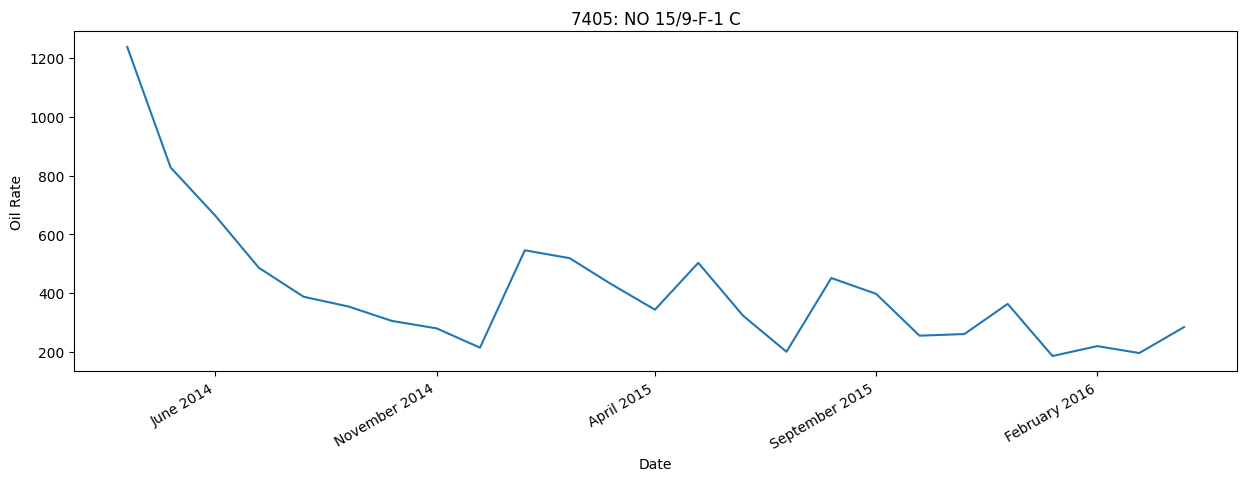

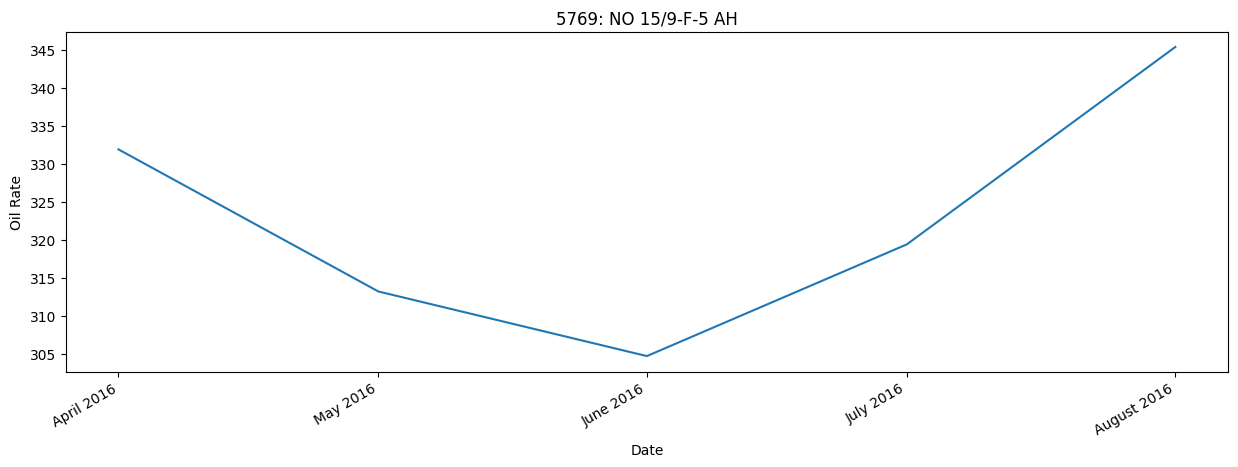

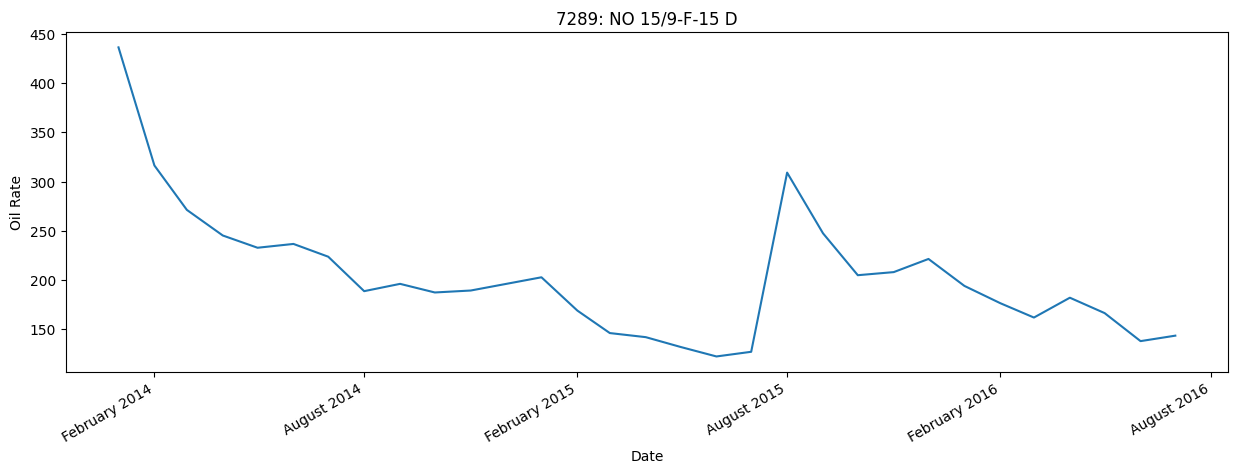

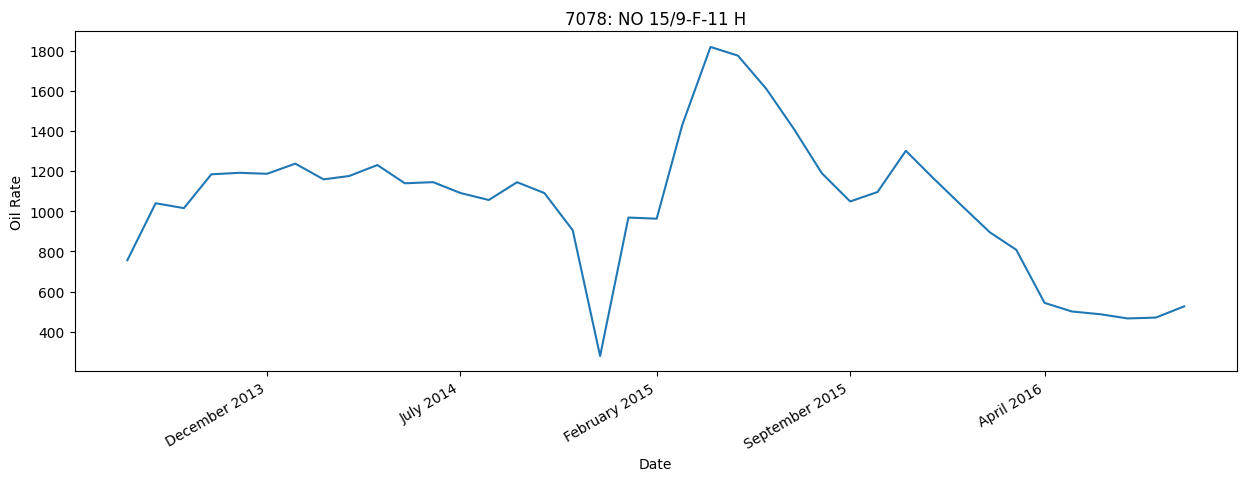

In [ ]:
for i, j in well_info.items():
    well = df_active_producers[df_active_producers['well_name'] == i].reset_index()[['date', 'oil_rate']] # retriving oil rate per well
    well['date'] = pd.to_datetime(well['date'])
    monthly_avg = well.groupby(well['date'].dt.to_period('M')).mean() # grouping data monthly
    monthly_avg.index = monthly_avg.index.to_timestamp()
    plt.figure(figsize=(15, 5))
    plt.title(f'{i}: {j}')
    plt.plot(monthly_avg.index, monthly_avg['oil_rate']) # plotting monthly data
    ax = plt.gca()
    ax.xaxis.set_major_locator(MonthLocator(interval=int(len(monthly_avg['oil_rate']) * 0.2))) # optimizing x axis ticks for better visualization
    ax.xaxis.set_major_formatter(DateFormatter('%B %Y'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('Oil Rate')
    plt.show()

Notes:
1. Make document
2. Add choke data to axis
3. Gas vol stat issue
4. Why is prod_hrs not correlated to oil volume
